# Clustering

In [26]:
library(readxl)
library(tidyverse) #data Manipulation
library(magrittr)
library(cluster) #Clustering algorithms
#install.packages('cluster.datasets')
library(cluster.datasets)
library(cowplot)
#install.packages('clValid')
library(clValid)
#install.packages('ggfortify')
library(ggfortify)
#install.packages('clustree')
library(clustree)
library(factoextra)#Clustering Algorithms & Visualization
library(FactoMineR)
library(gridExtra)
library(corrplot)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
#install.packages('NbClust')
library(NbClust)
#install.packages('writexl')
library(writexl)
library(GGally)
#install.packages('ggiraphExtra')
library(ggiraphExtra)
library(knitr)
library(kableExtra)

In [27]:
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)

dfsimple[is.na(dfsimple)] <- 0
head(dfsimple)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,2
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,2


In [28]:
df.wa.country <- dfsimple[,c('Country','phom','pipy','ptap','bore','pwel','pspr','rain', 
                             'uwel','uspr','truc', 'ctan','bott','othw',  'surw',
                             'tles','tmor','watp')]
df.wa.country[is.na(df.wa.country)] <- 0
head(df.wa.country)
sapply(df.wa.country, class)

Country,phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
Albania,48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
Angola,4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
Armenia,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
Azerbaijan,34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
Bangladesh,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5


Country        phom        pipy        ptap        bore        pwel 
"character"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       pspr        rain        uwel        uspr        truc        ctan 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric" 
       bott        othw        surw        tles        tmor        watp 
  "numeric"   "numeric"   "numeric"   "numeric"   "numeric"   "numeric"

To apply clustering, we want to only use water accessibility variables

In [29]:
write_xlsx(df.wa.country , '../../results/df-water-access.xlsx')

In [30]:
df.explore <- dfsimple[,c('Country','bicy','cart','mcyc',
                         'pcar',
                         'boat',
                         'wigc')]
head(df.explore)

Country,bicy,cart,mcyc,pcar,boat,wigc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,30.0,5.8,35.2,11.8,0.0,0.1
Albania,26.4,3.2,9.6,37.0,0.7,0.1
Angola,4.6,1.3,17.8,10.9,0.4,0.3
Armenia,8.6,0.4,0.2,39.2,0.3,0.1
Azerbaijan,6.9,3.3,1.1,20.4,0.1,0.0
Bangladesh,25.1,0.0,6.4,0.8,0.0,0.3


In [31]:
write_xlsx(df.explore , '../../results/df-water-explore.xlsx')

linkage: single or average or complete and Different Methods

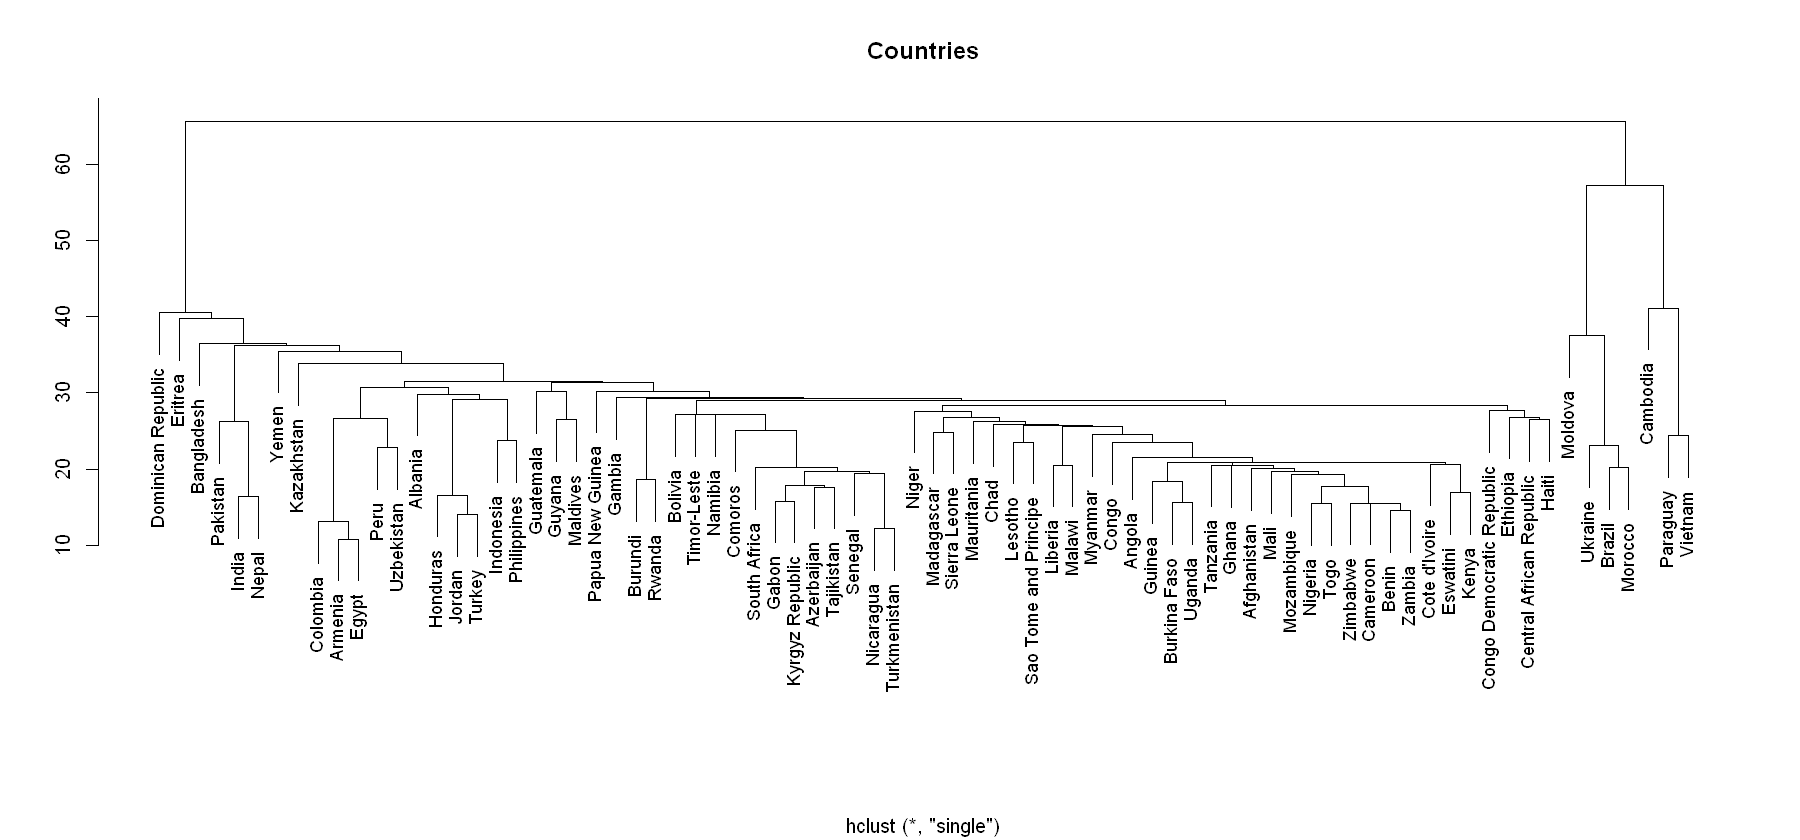

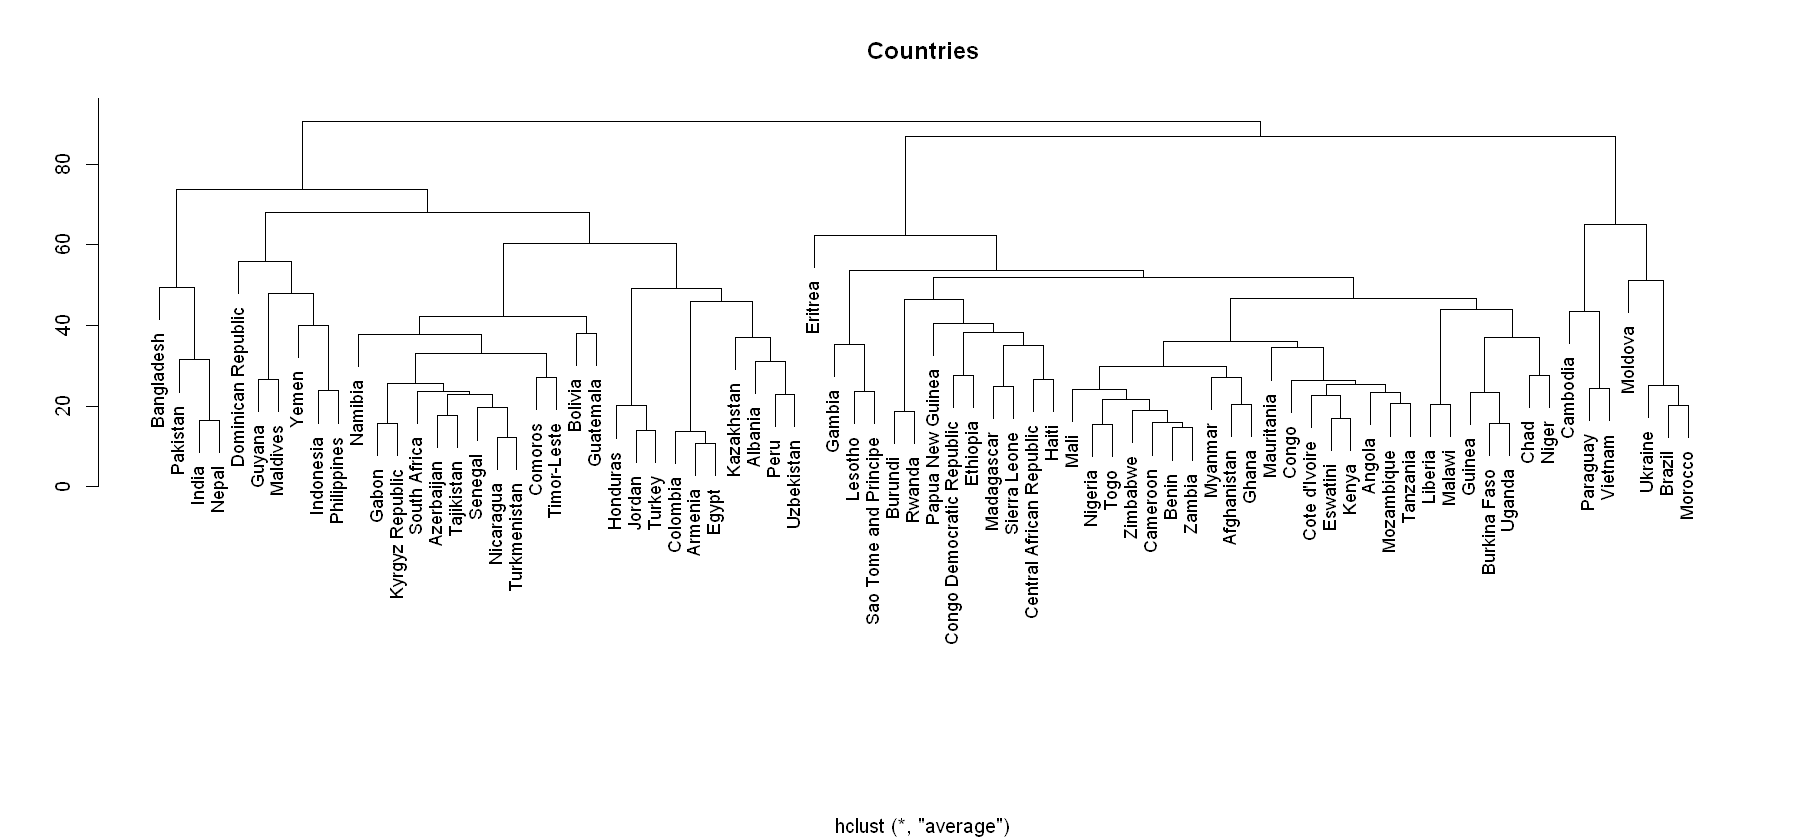

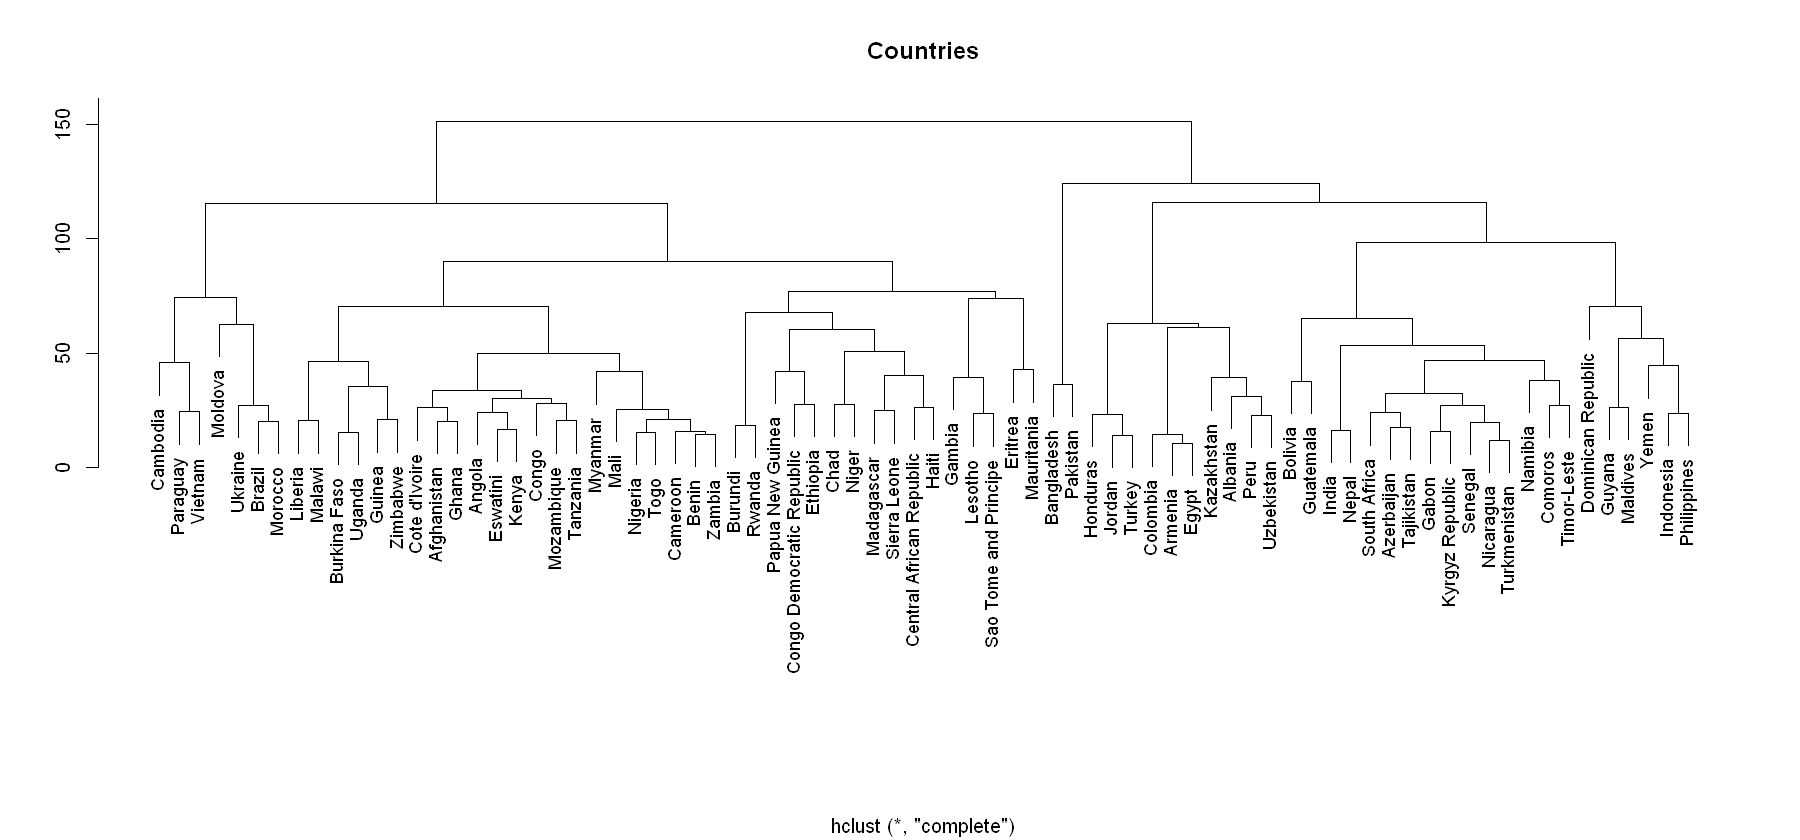

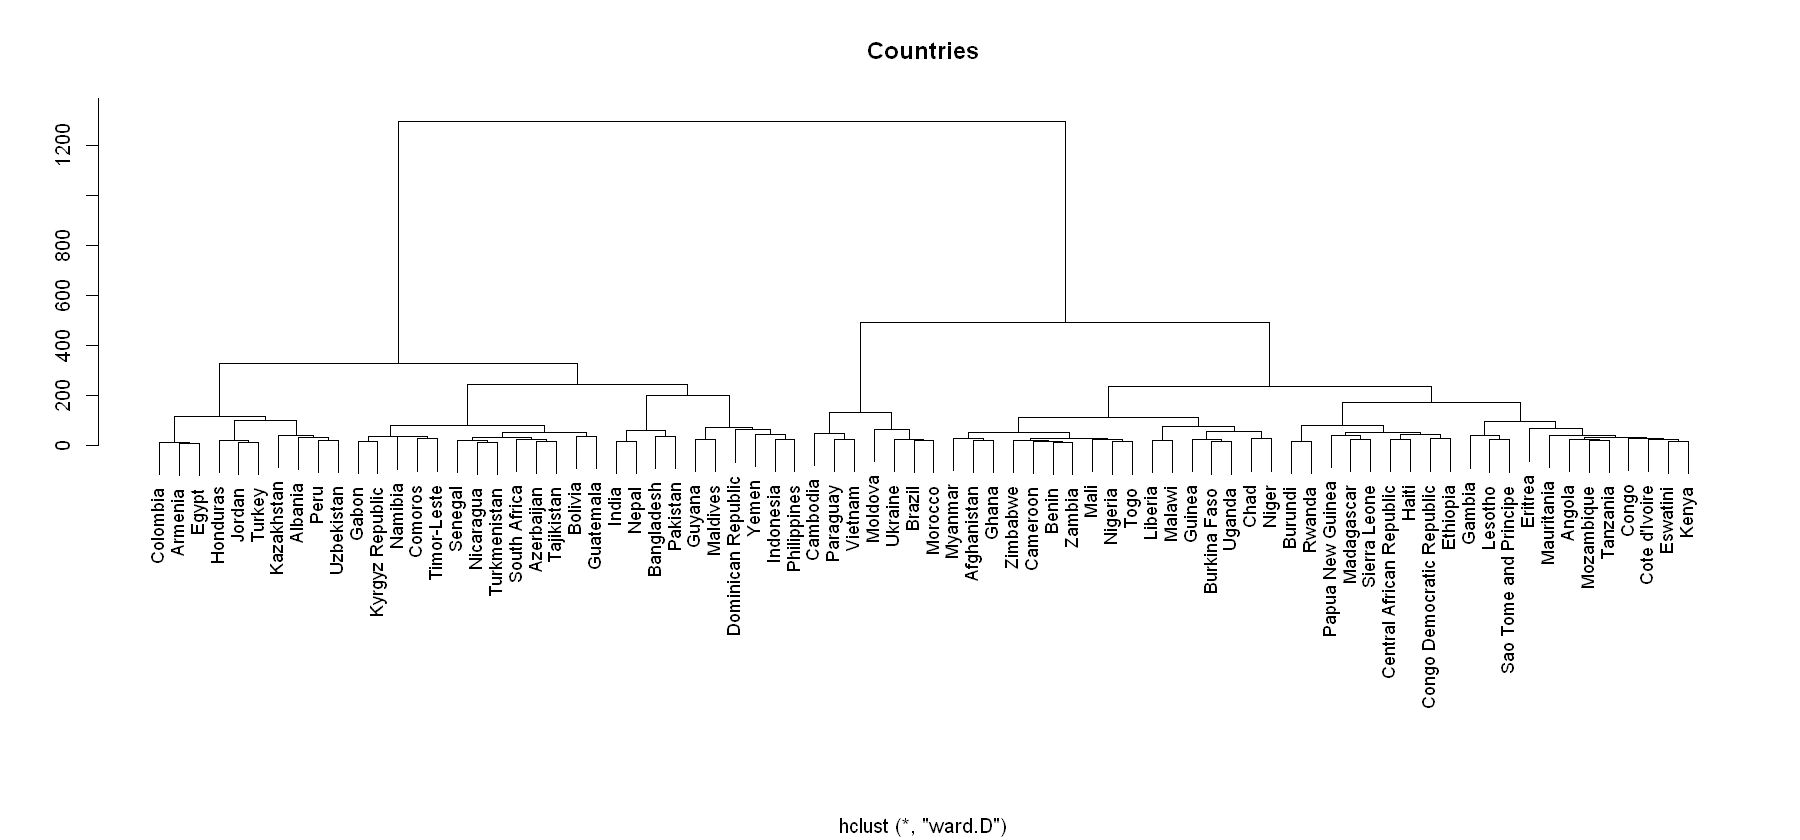

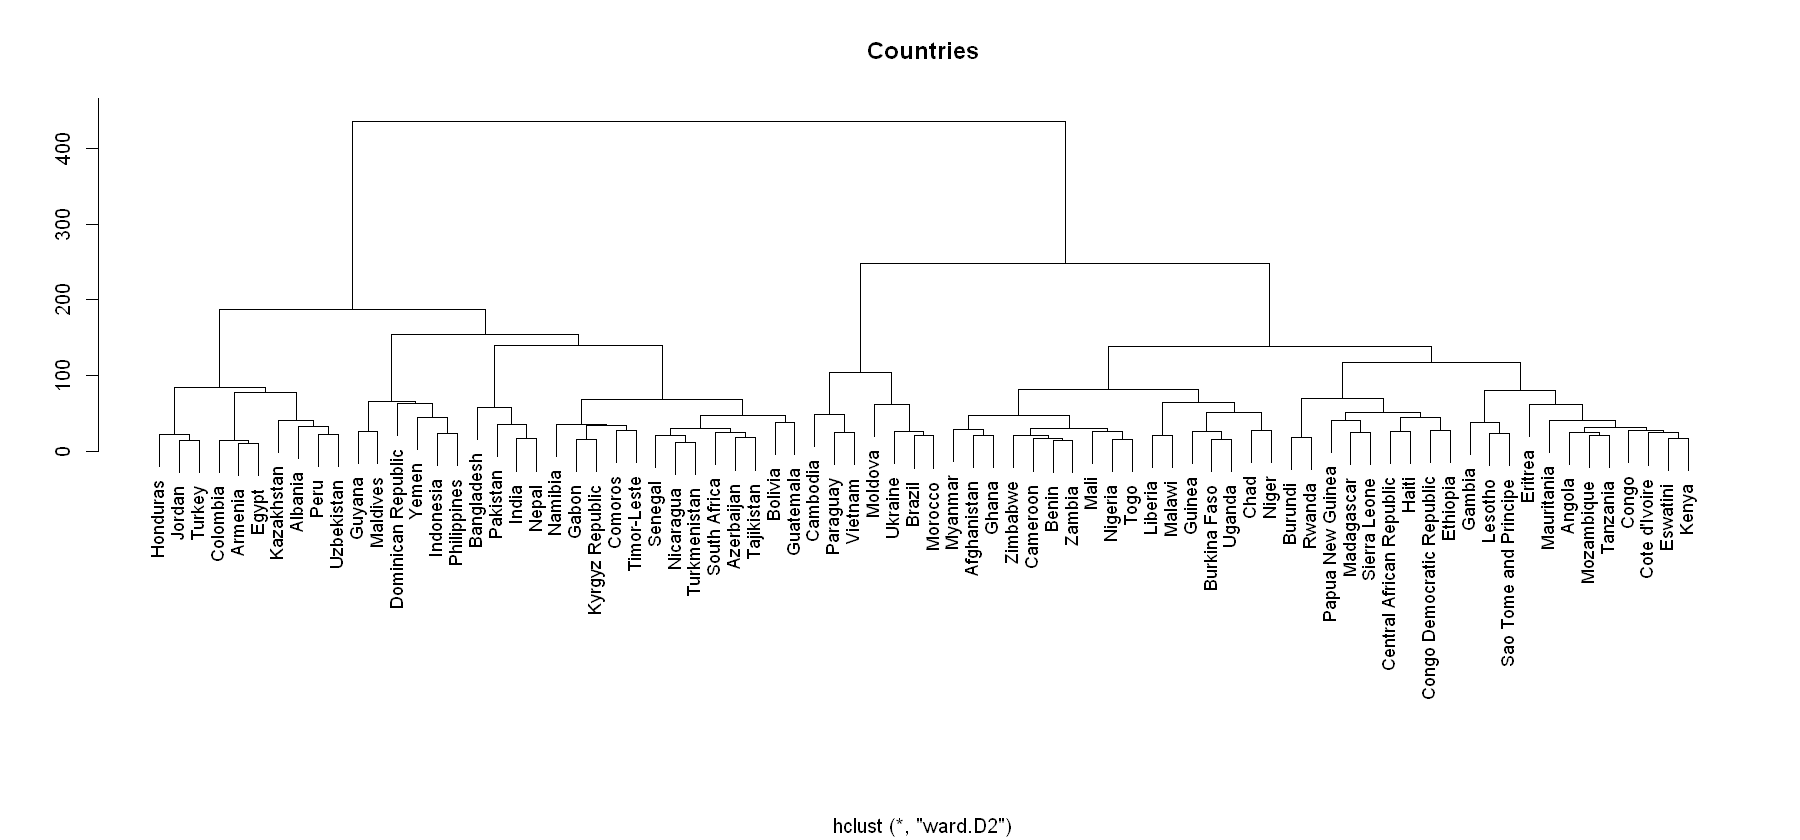

In [33]:
df.wa <- df.wa.country[,c(2:18)]

hc=hclust(dist(df.wa), method ="single")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc=hclust(dist(df.wa), method ="average")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.complete =hclust(dist(df.wa), method ="complete")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.complete, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

hc.ward=hclust(dist(df.wa), method ="ward.D")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)



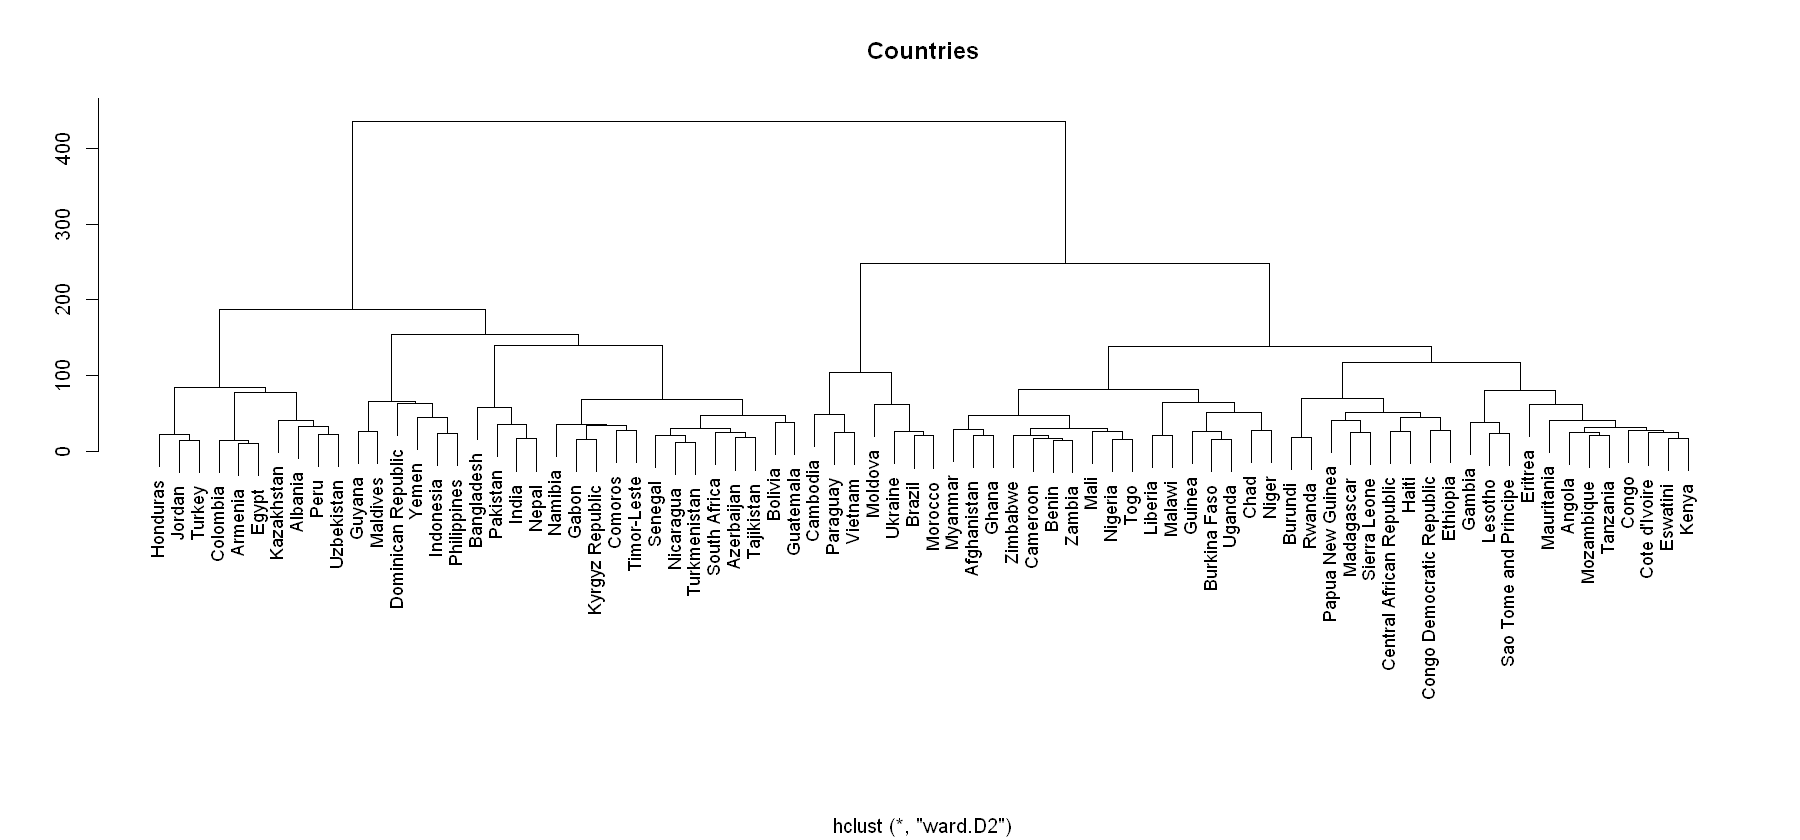

In [69]:
hc.ward2=hclust(dist(df.wa), method ="ward.D2")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward2, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa.country$Country)

In [34]:
head(df.wa,7)
colnames(df.wa)

phom,pipy,ptap,bore,pwel,pspr,rain,uwel,uspr,truc,ctan,bott,othw,surw,tles,tmor,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.3,4.8,14.2,20.1,18.5,4.7,0.4,11.1,8.6,1.5,4.4,0.2,1.7,7.3,45.2,8.2,45.3
48.8,5.2,2.4,1.4,4.1,2.5,0.0,0.8,0.8,14.1,0.2,19.6,0.1,0.0,20.6,1.1,77.9
4.3,9.7,10.3,1.9,9.1,3.3,1.7,8.3,4.8,9.7,4.3,1.2,1.8,18.0,46.1,15.6,34.5
88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.0,0.1,1.5,0.0,0.0,0.0,0.0,1.6,0.1,97.6
34.0,19.7,3.5,9.3,6.2,7.5,0.0,0.2,1.1,9.5,0.7,0.1,1.1,7.0,18.7,4.4,75.9
4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.6,0.3,0.0,0.1,0.3,0.1,1.2,22.7,1.6,75.5
5.1,4.2,13.0,28.9,4.4,0.3,0.4,20.8,1.2,0.2,0.3,0.0,0.4,5.8,49.8,12.1,37.4


[1] "phom" "pipy" "ptap" "bore" "pwel" "pspr" "rain" "uwel" "uspr" "truc"
[11] "ctan" "bott" "othw" "surw" "tles" "tmor" "watp"

# Determining the Best Cut for different methods

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


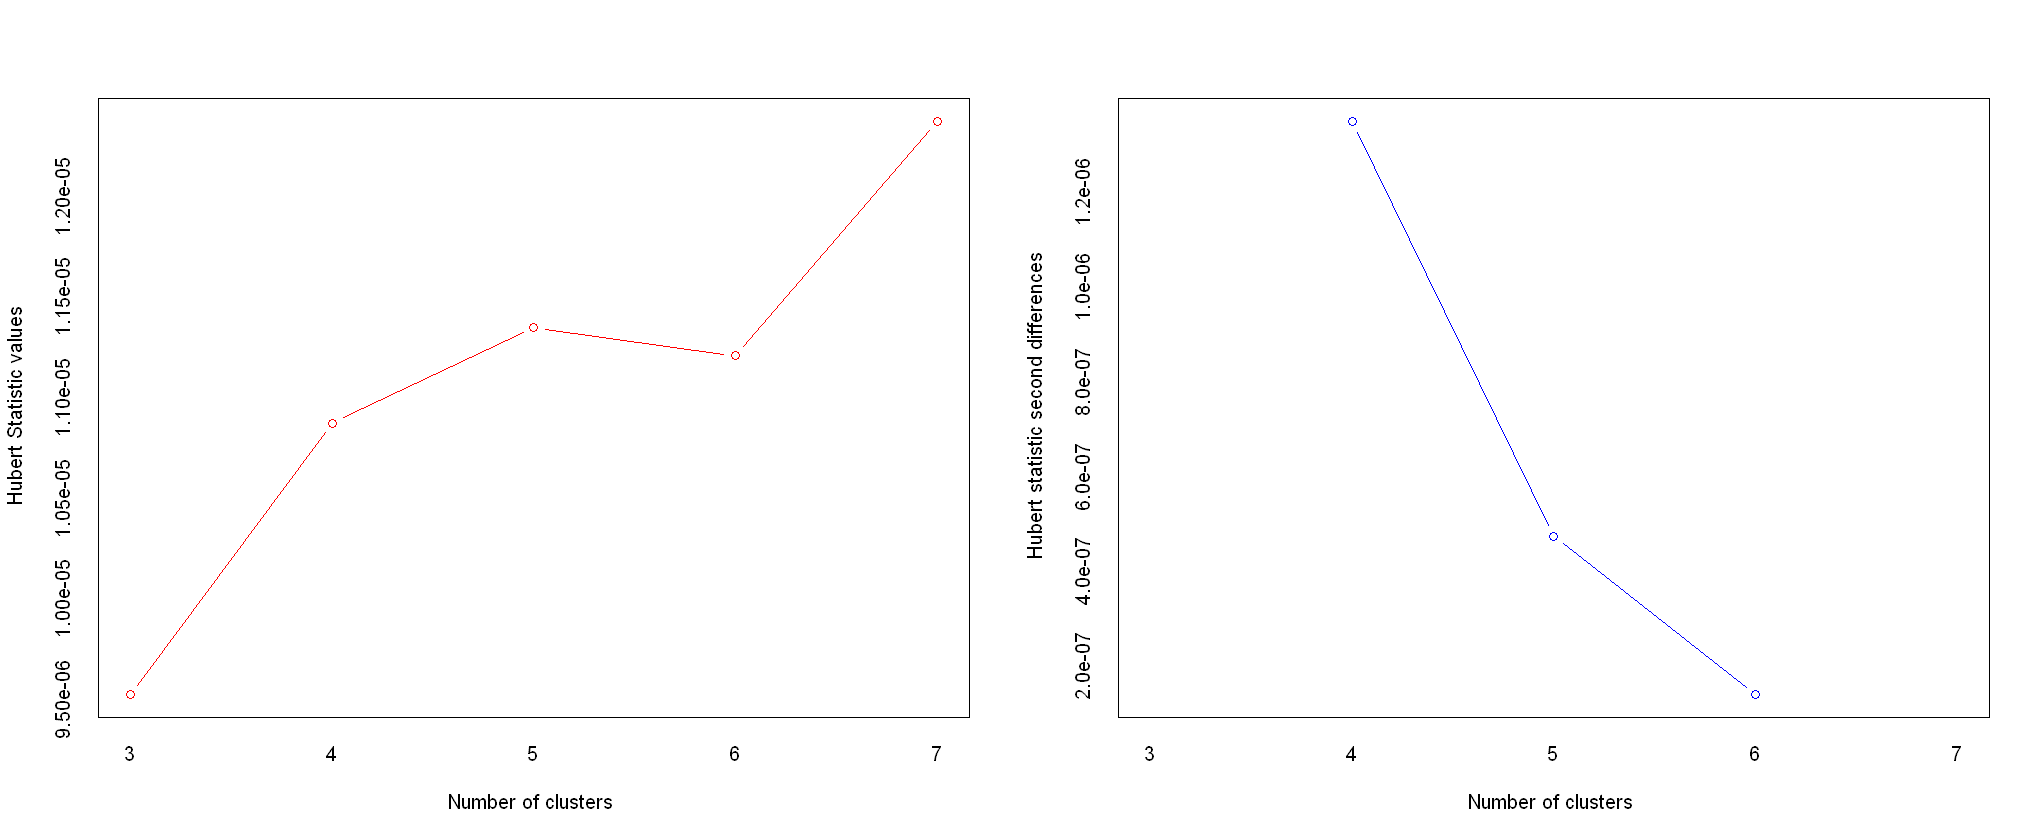

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 9 proposed 3 as the best number of clusters 
* 6 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 4 proposed 6 as the best number of clusters 
* 4 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


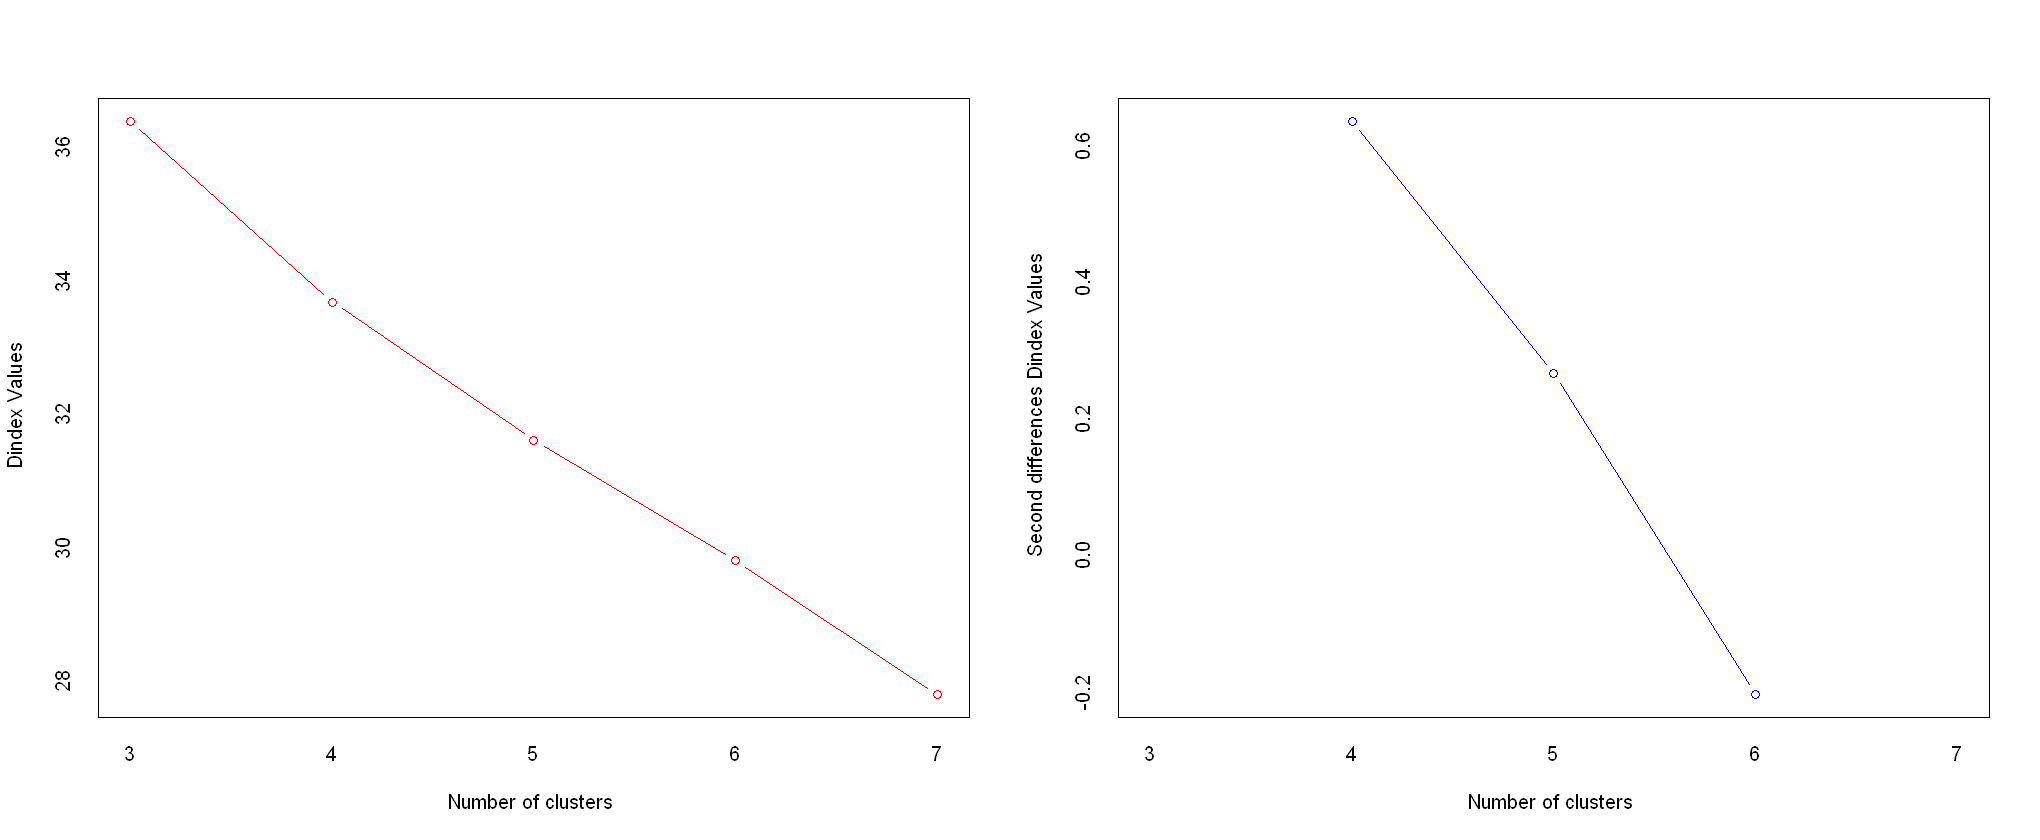

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


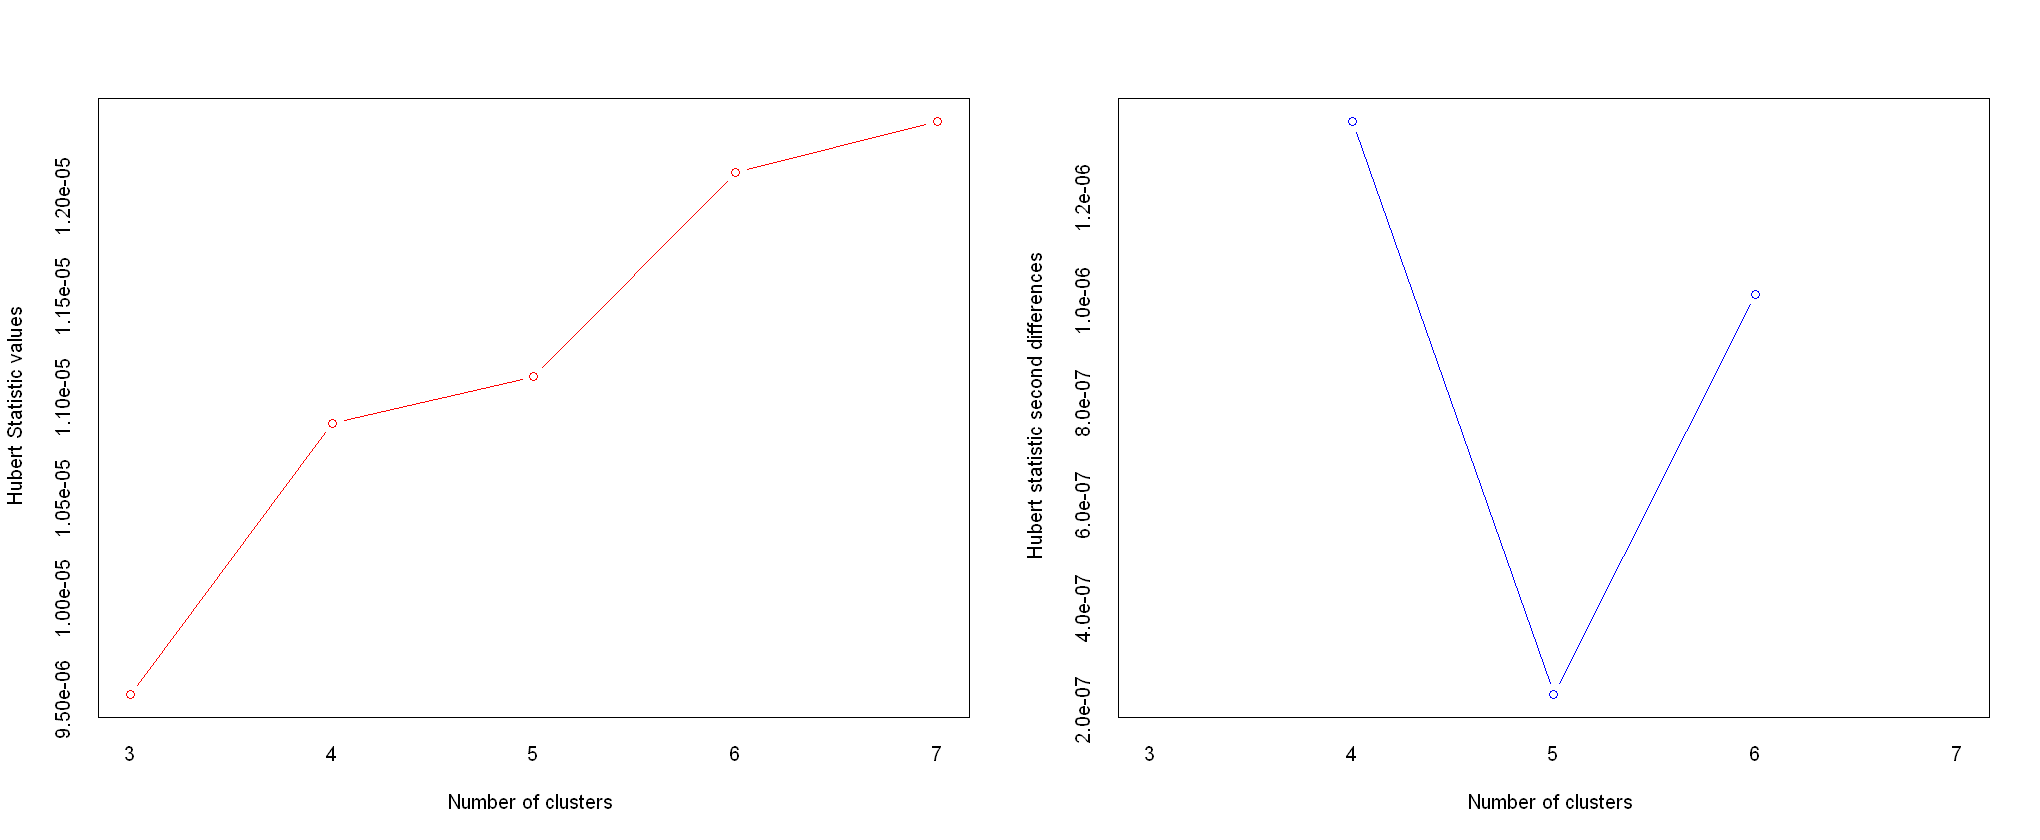

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 3 as the best number of clusters 
* 6 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 6 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


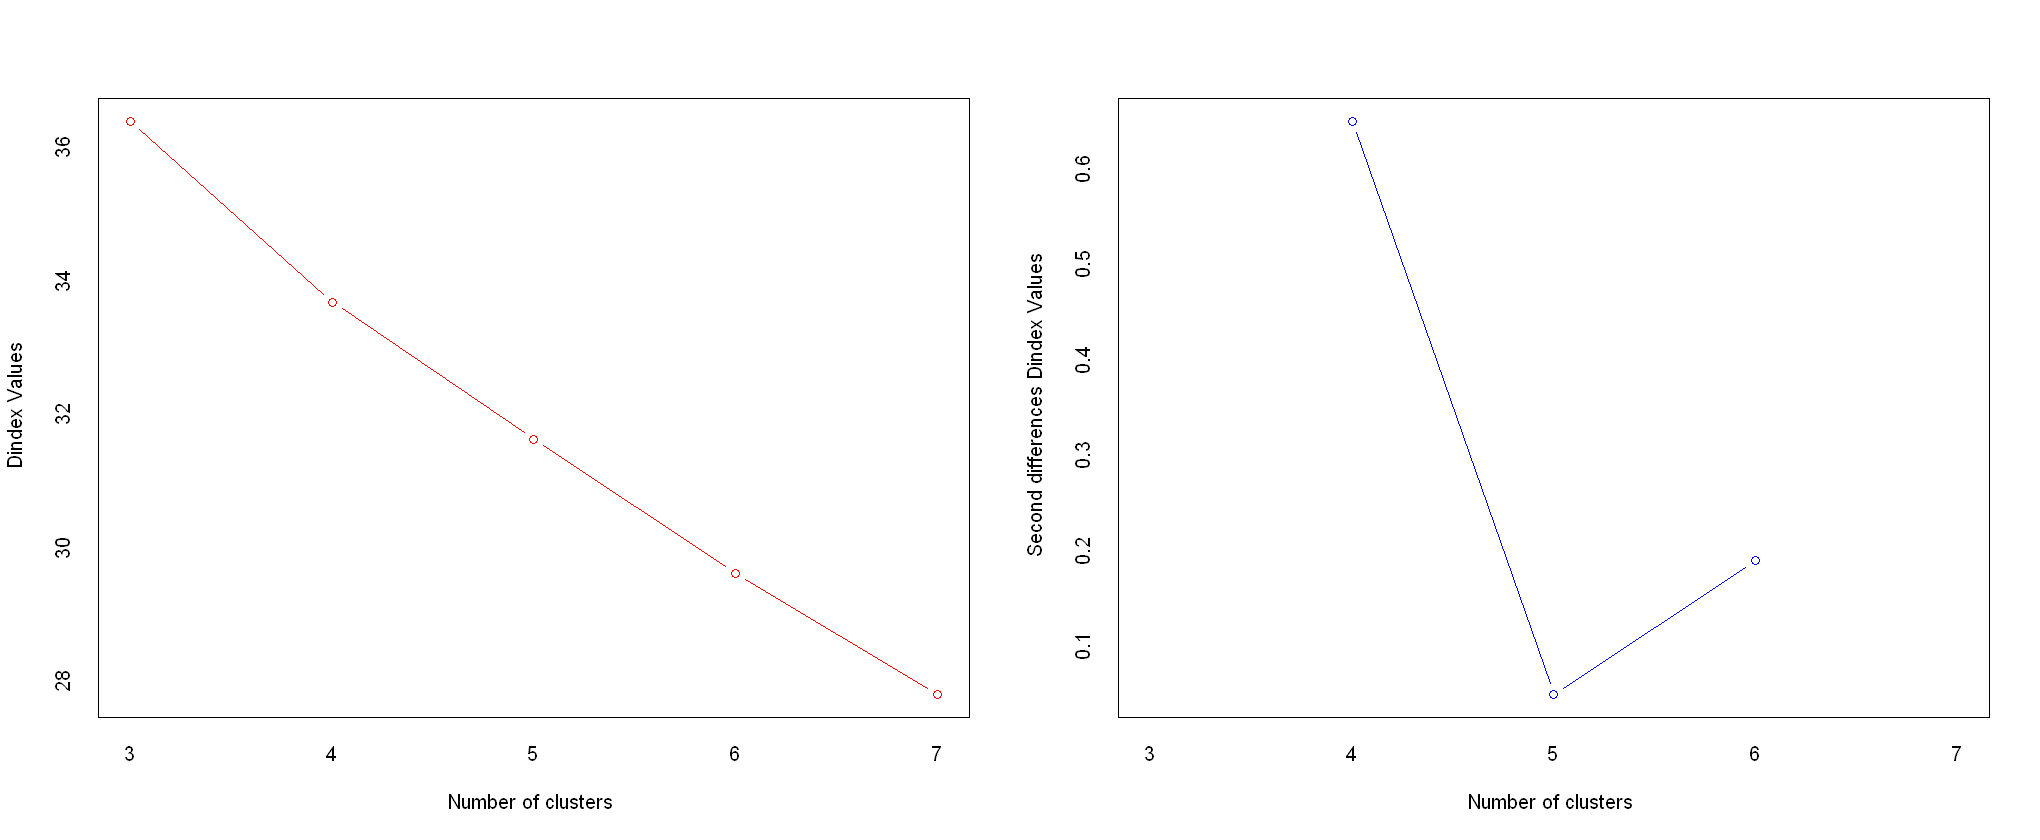

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


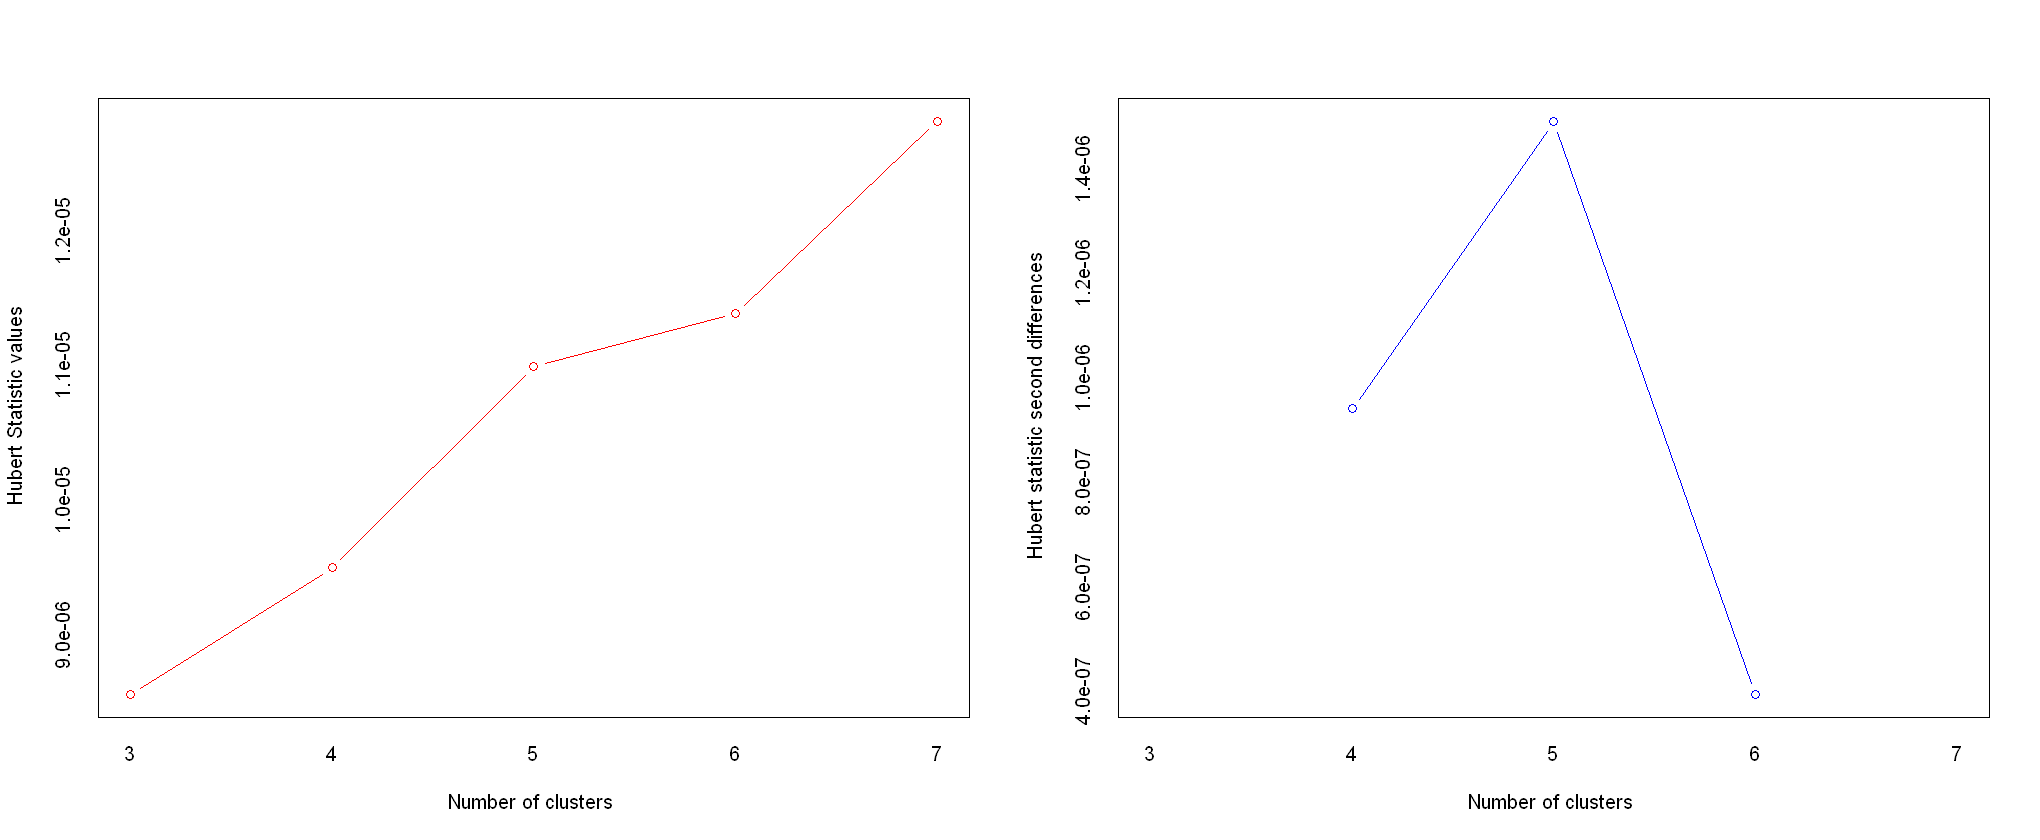

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 3 as the best number of clusters 
* 2 proposed 4 as the best number of clusters 
* 11 proposed 5 as the best number of clusters 
* 7 proposed 6 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


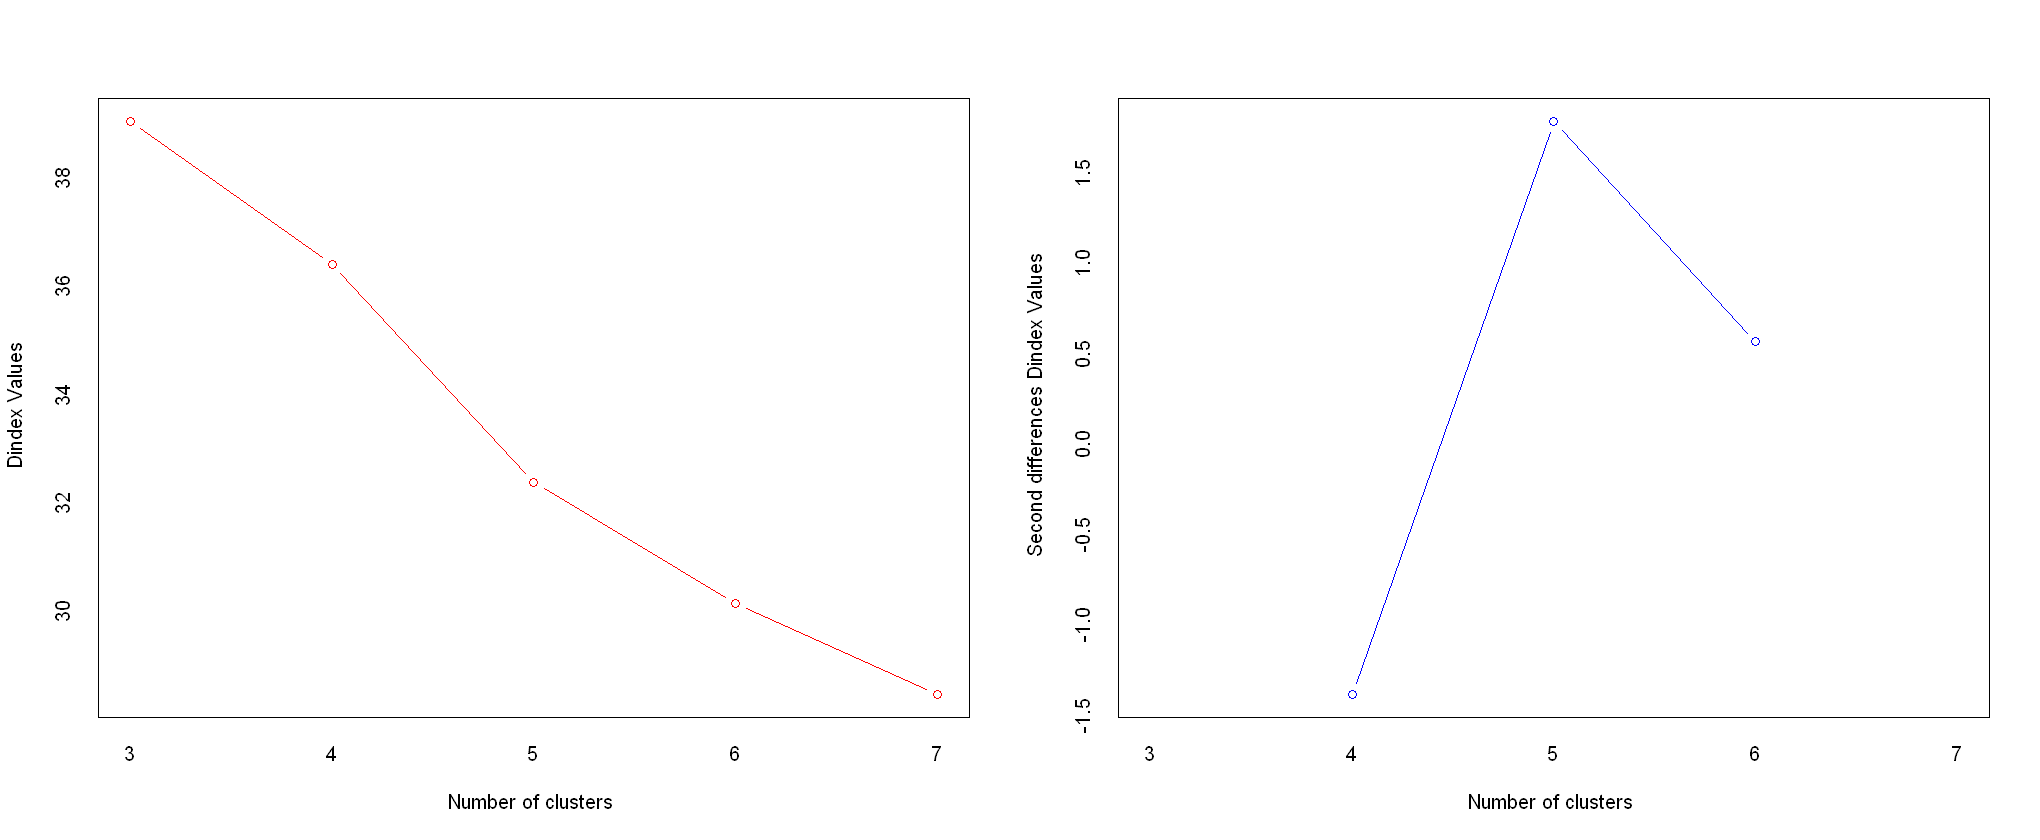

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


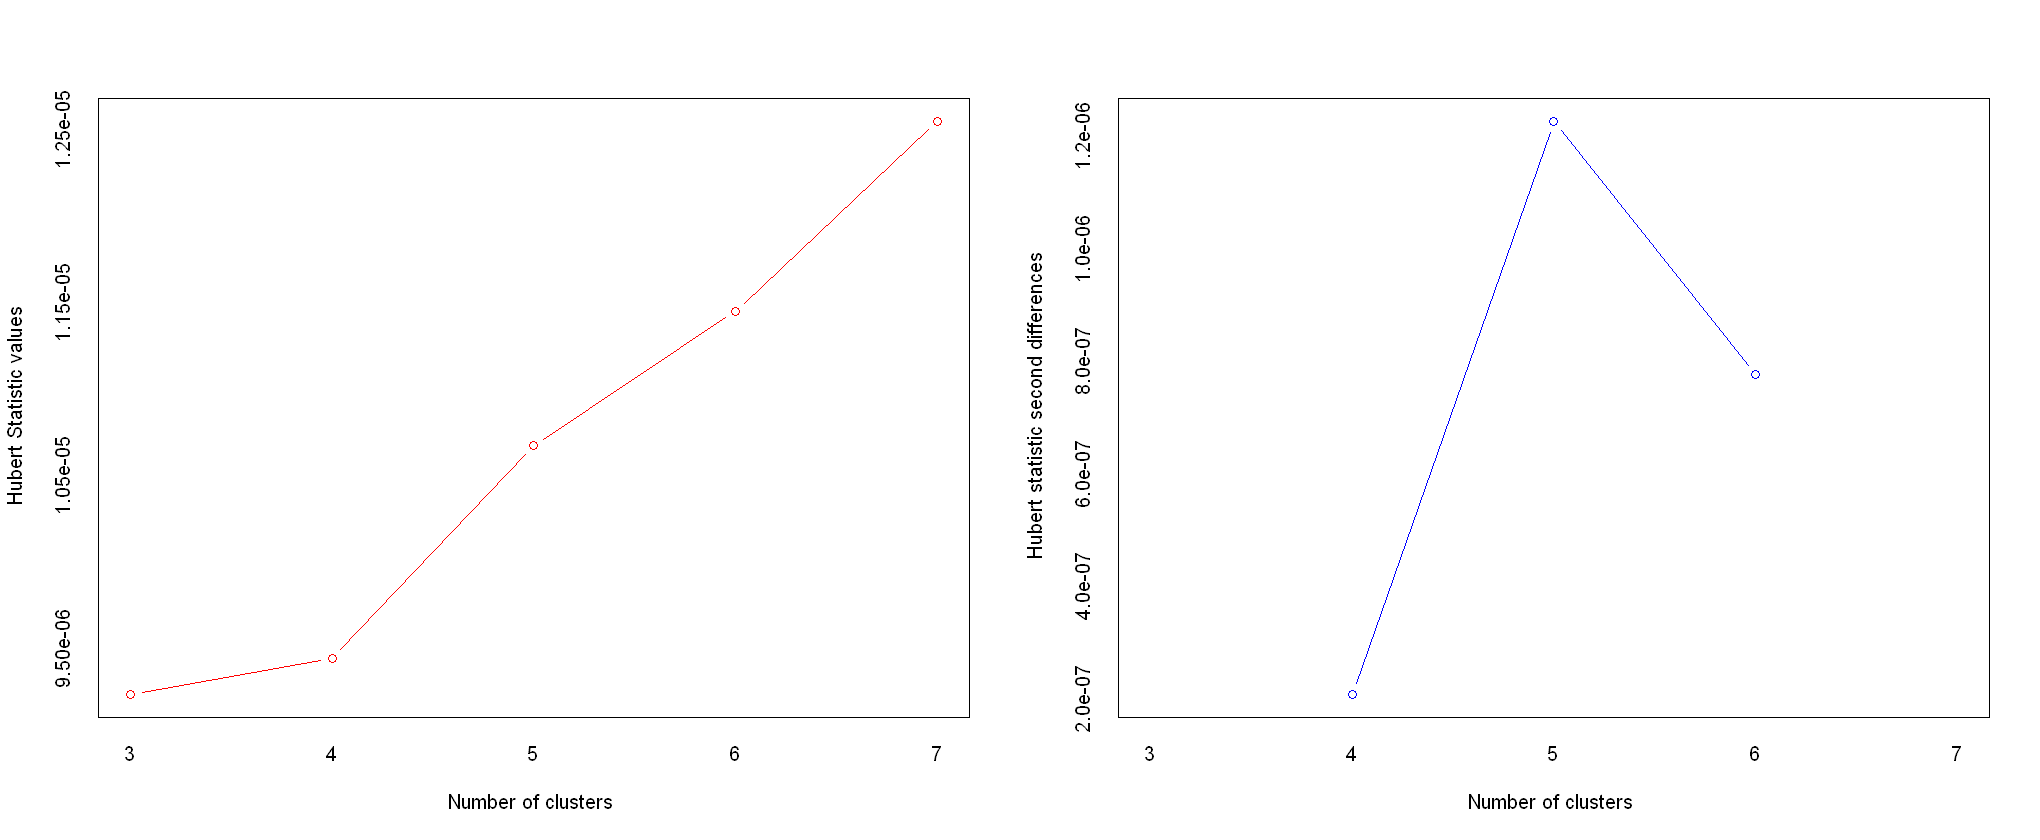

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 3 as the best number of clusters 
* 5 proposed 4 as the best number of clusters 
* 15 proposed 5 as the best number of clusters 
* 3 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  5 
 
 
******************************************************************* 


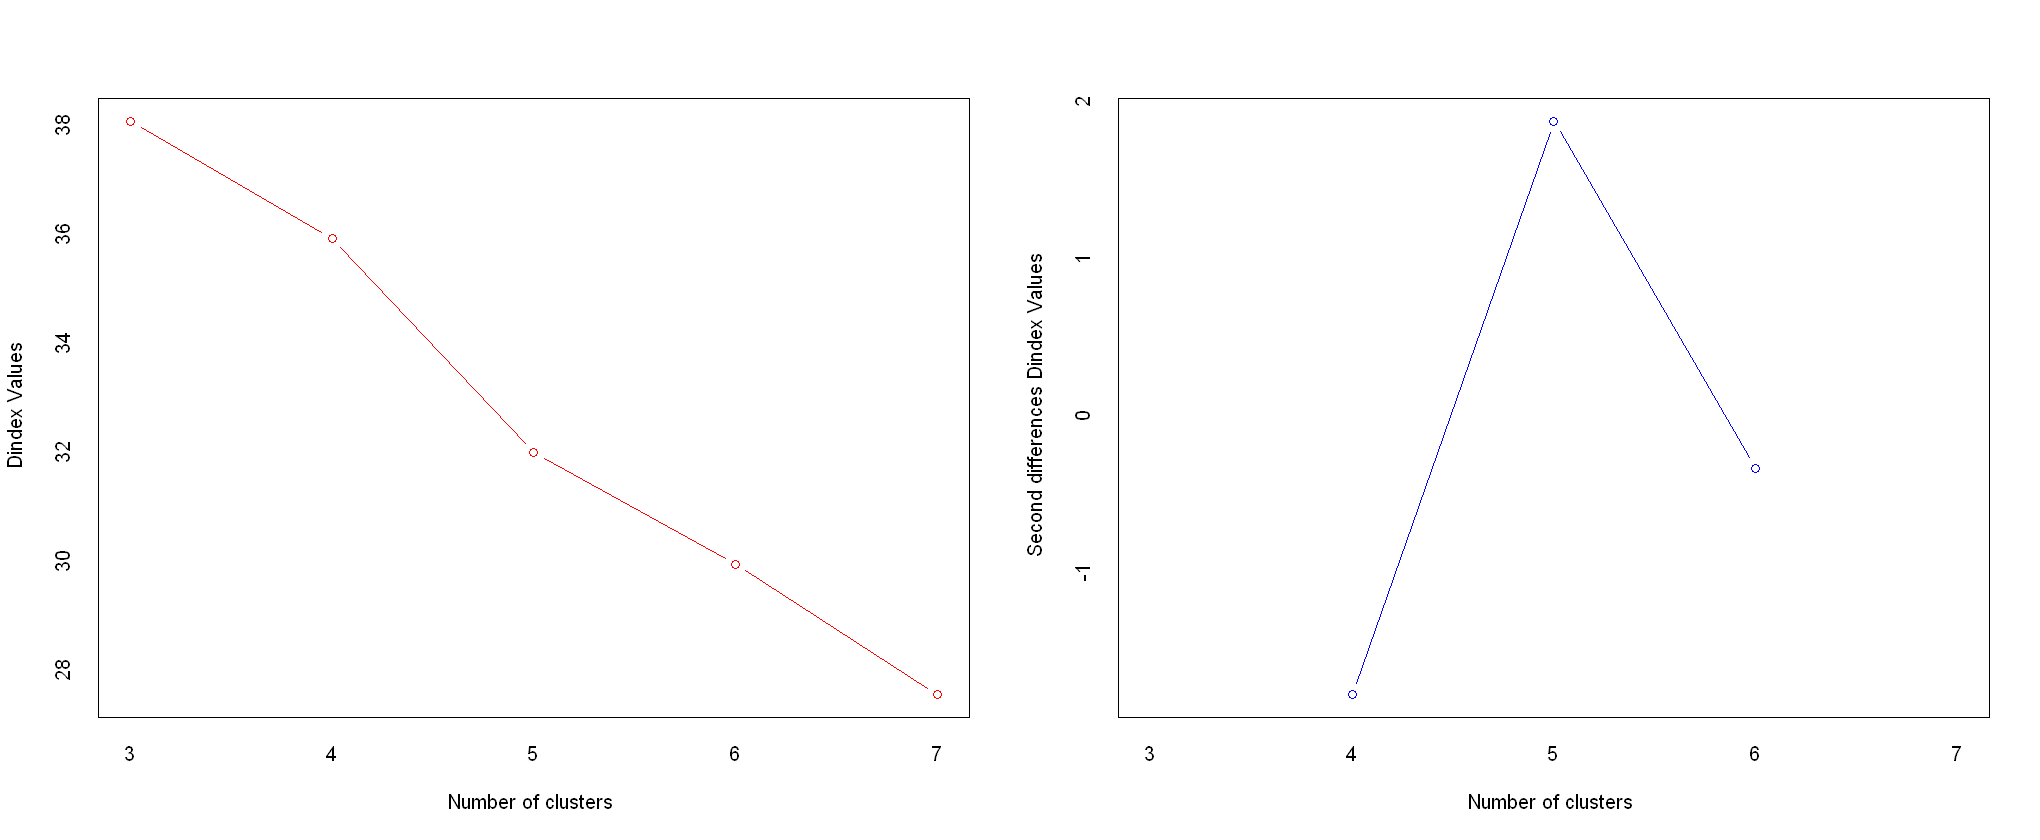

In [58]:
optimald2 = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D2", index = "alllong" ,alphaBeale = 0.1)
optimald = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D", index = 'alllong',alphaBeale = 0.1)
optimalcomplete = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "complete", index = 'alllong',alphaBeale = 0.1)
optimal.kmeans = NbClust(data= df.wa, distance = "euclidean", min.nc = 3, max.nc = 7, method = "kmeans", index = 'alllong',alphaBeale = 0.1)



Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") {:
"the condition has length > 1 and only the first element will be used"


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 1 proposed  2 as the best number of clusters
* 9 proposed  3 as the best number of clusters
* 6 proposed  4 as the best number of clusters
* 1 proposed  5 as the best number of clusters
* 4 proposed  6 as the best number of clusters
* 4 proposed  7 as the best number of clusters
* 3 proposed  NA's as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  3 .



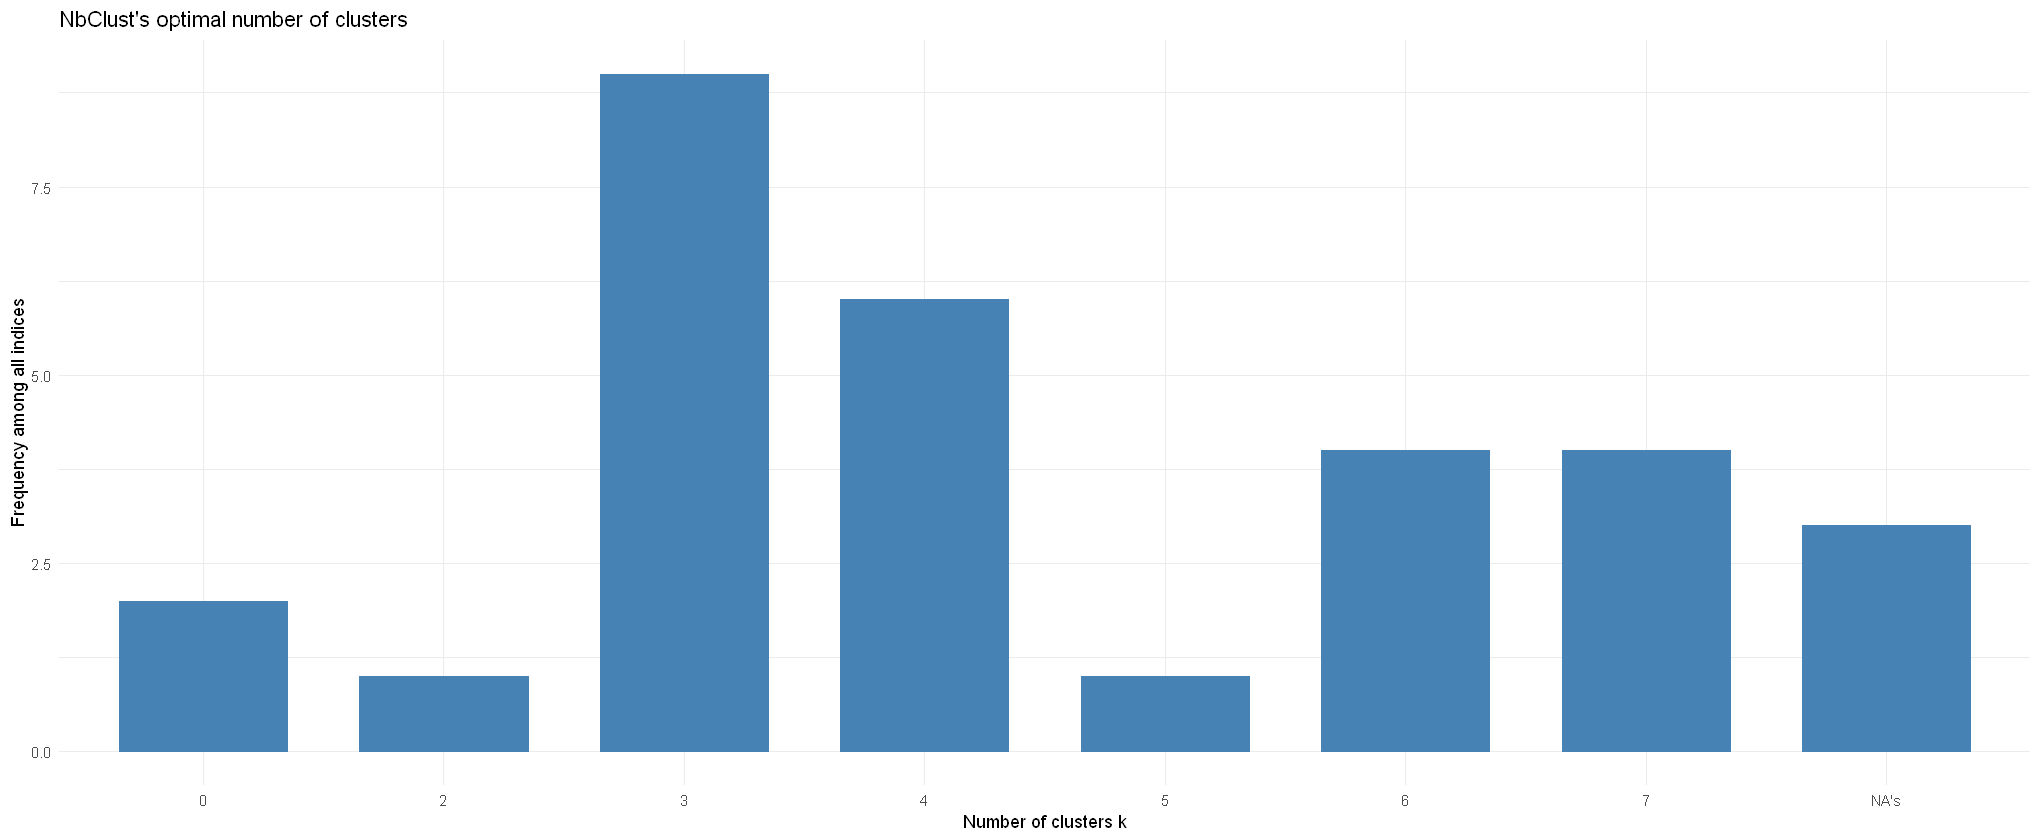

In [59]:
factoextra::fviz_nbclust(optimald2) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")

Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a multiple of replacement length"
Warning message in tmp[k] <- kmeans(df.wa, k, nstart = 30):
"number of items to replace is not a 

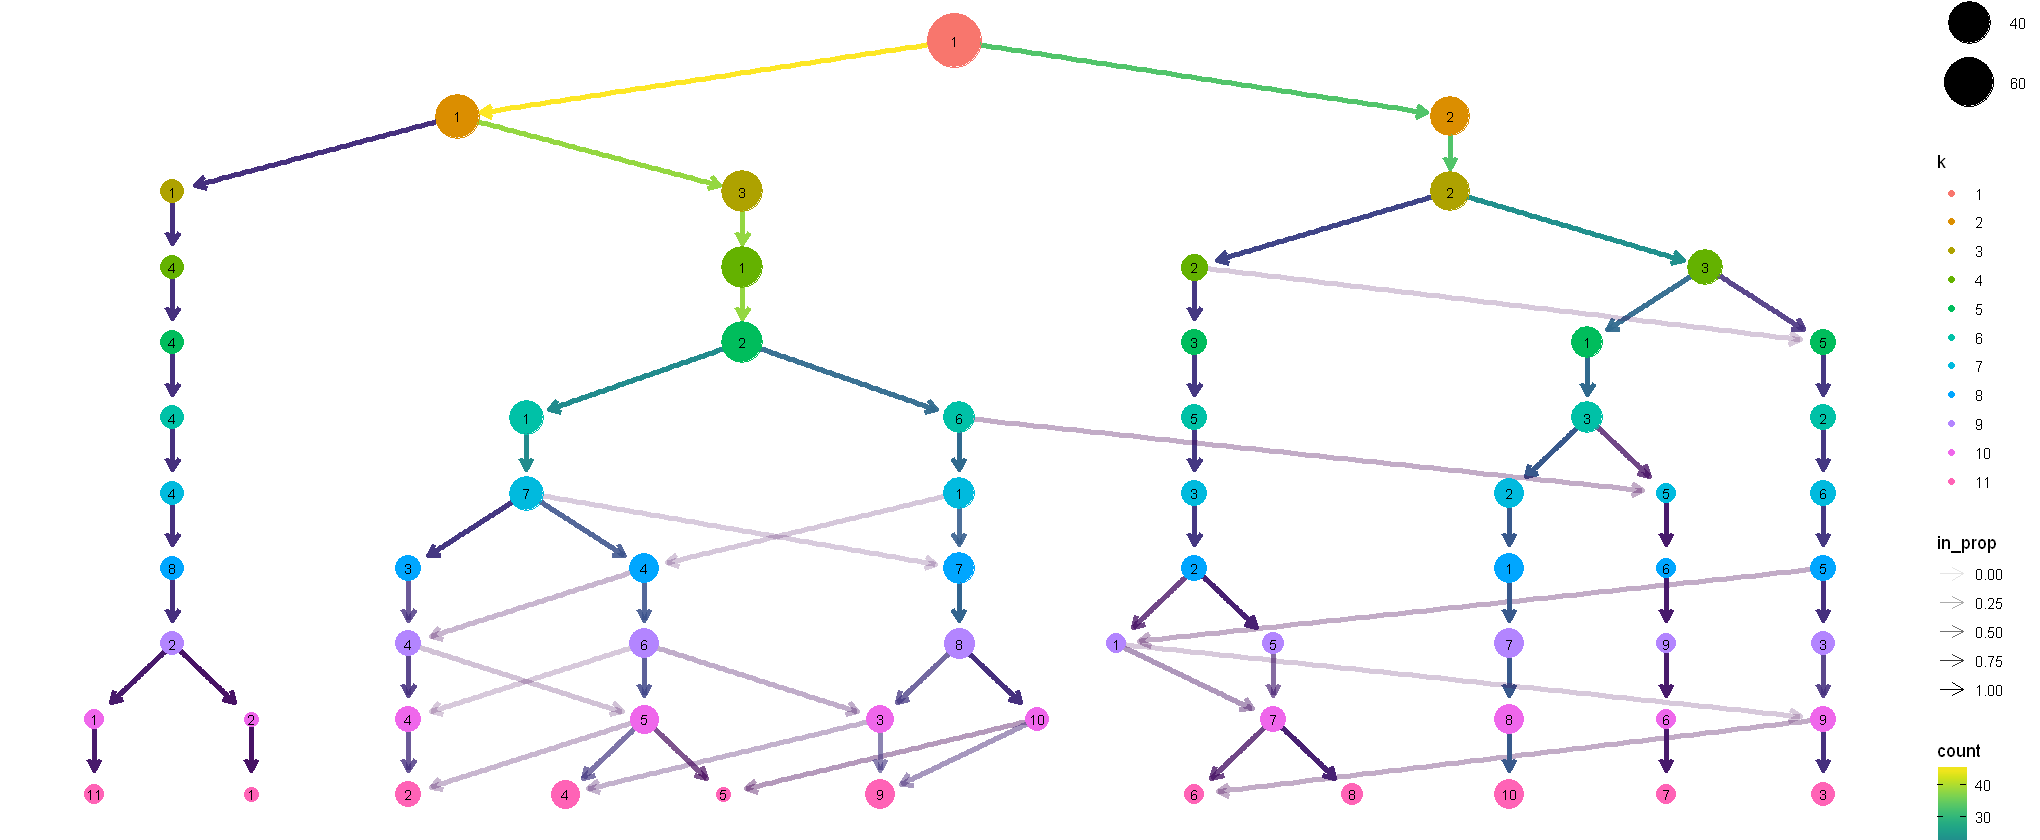

In [60]:
tmp <- NULL
# Comparing from 1 to 7 clusters
for (k in 1:11){
  tmp[k] <- kmeans(df.wa, k, nstart = 30)
}
df <- data.frame(tmp)
# add a prefix to the column names
colnames(df) <- seq(1:11)
colnames(df) <- paste0("k",colnames(df))
# get individual PCA
df.pca <- prcomp(df, center = TRUE, scale. = FALSE)
ind.coord <- df.pca$x
ind.coord <- ind.coord[,1:2]
df <- bind_cols(as.data.frame(df), as.data.frame(ind.coord))
clustree(df, prefix = "k")

In this figure the size of each node corresponds to the number of samples in each cluster, and the arrows are coloured according to the number of samples each cluster receives. A separate set of arrows, the transparent ones, called the incoming node proportion, are also coloured and shows how samples from one group end up in another group — an indicator of cluster instability.
In this graph we see that as we move from k=2 to k=3 a number of species from the lookers-left cluster are reasigned to the third cluster on the right. As we move from k=4 to k=4, 4 to 9, 5 to 10 we see one node with multiple incoming edges an indicator that we over-clustered the data.
It can also be useful to overlay this dimension on other dimensions in the data, particularly those that come from dimensionality reduction techniques. We can do this using the clustree_overlay() function:

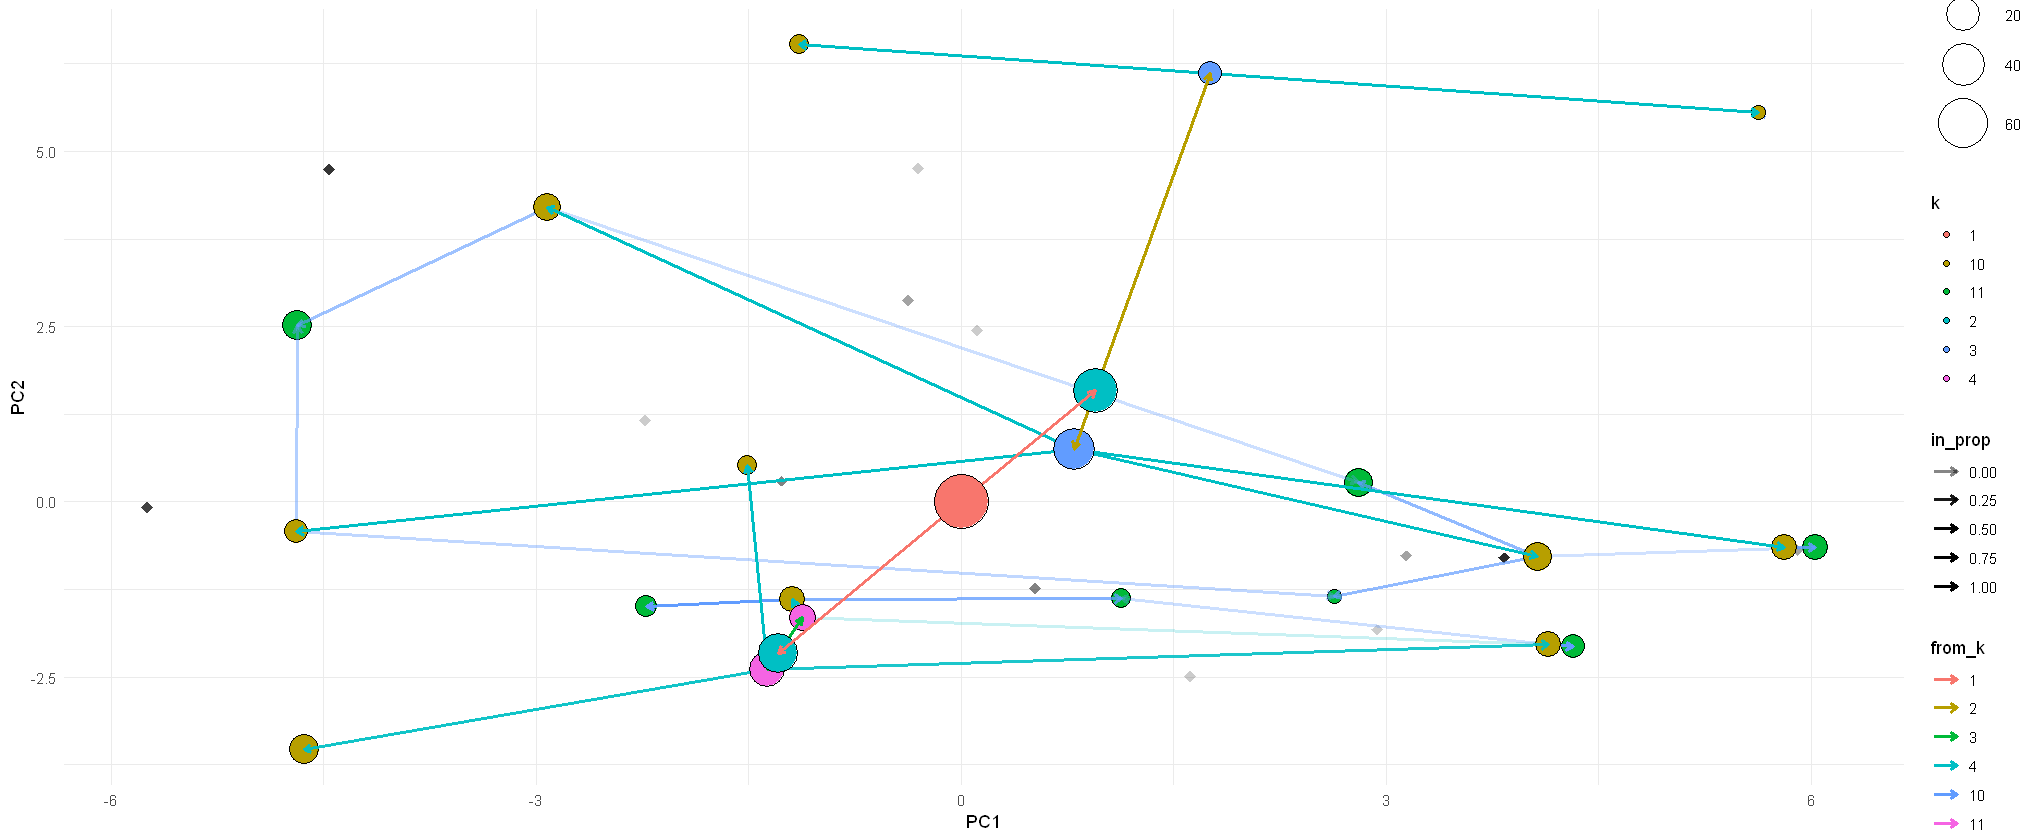

In [61]:
df_subset <- df %>% select(1:4,10:13)
clustree_overlay(df_subset, prefix = "k", x_value = "PC1", y_value = "PC2")

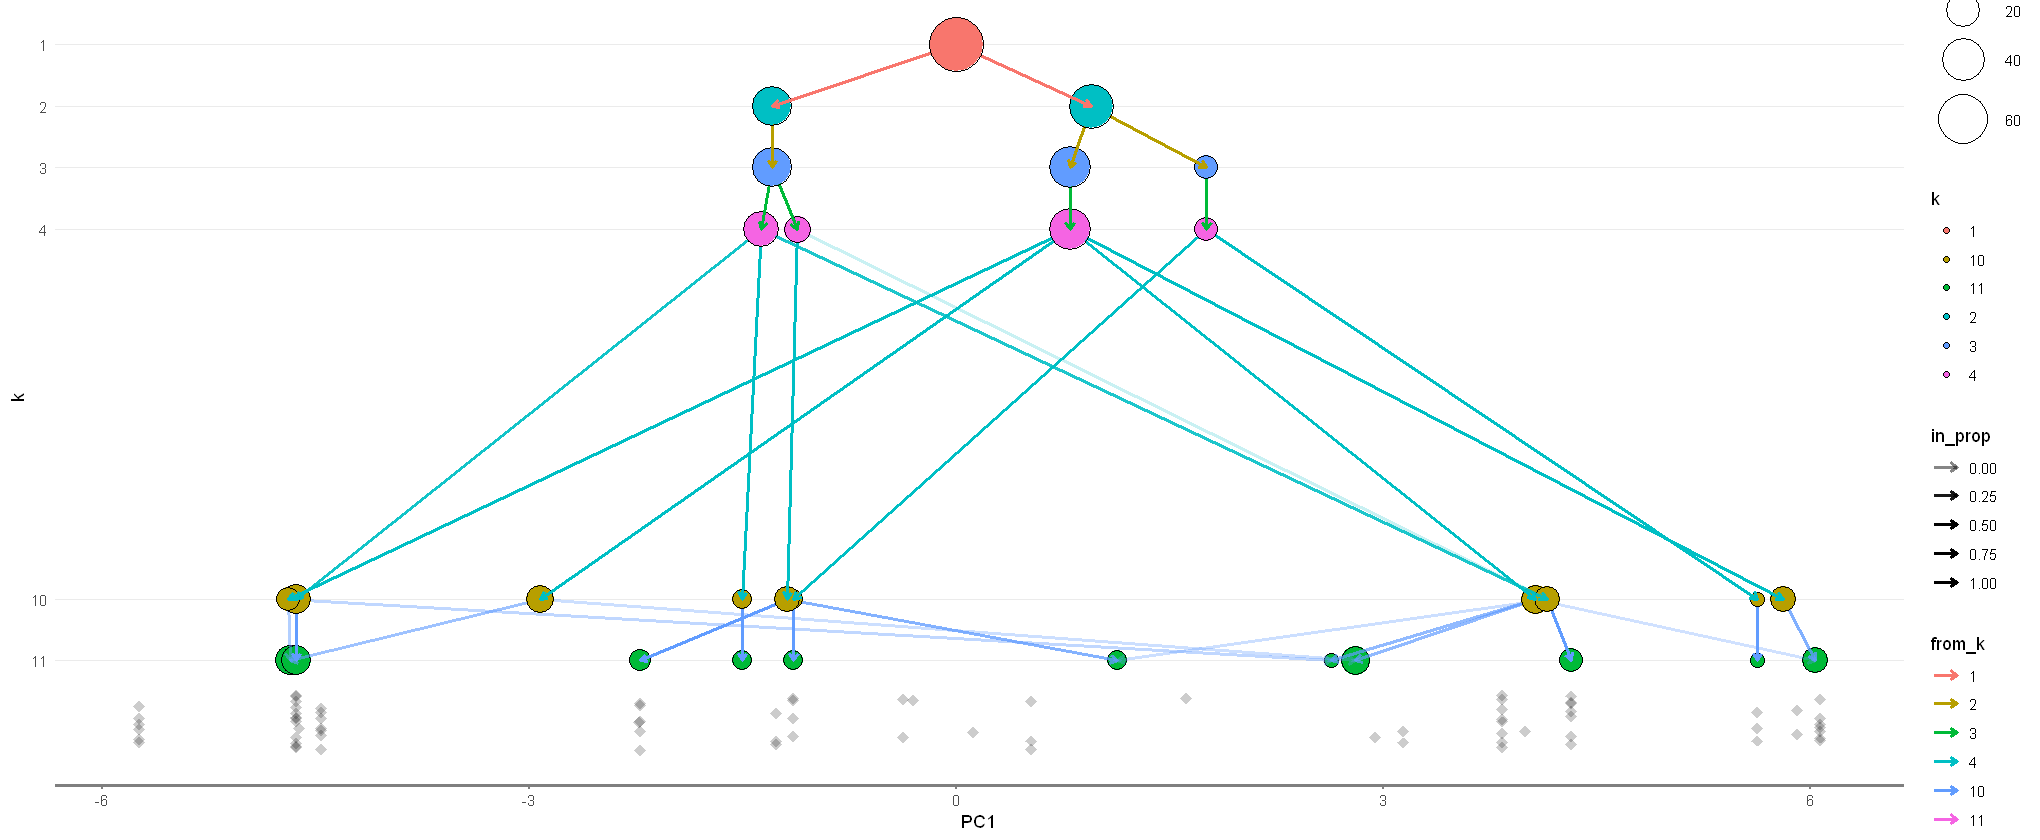

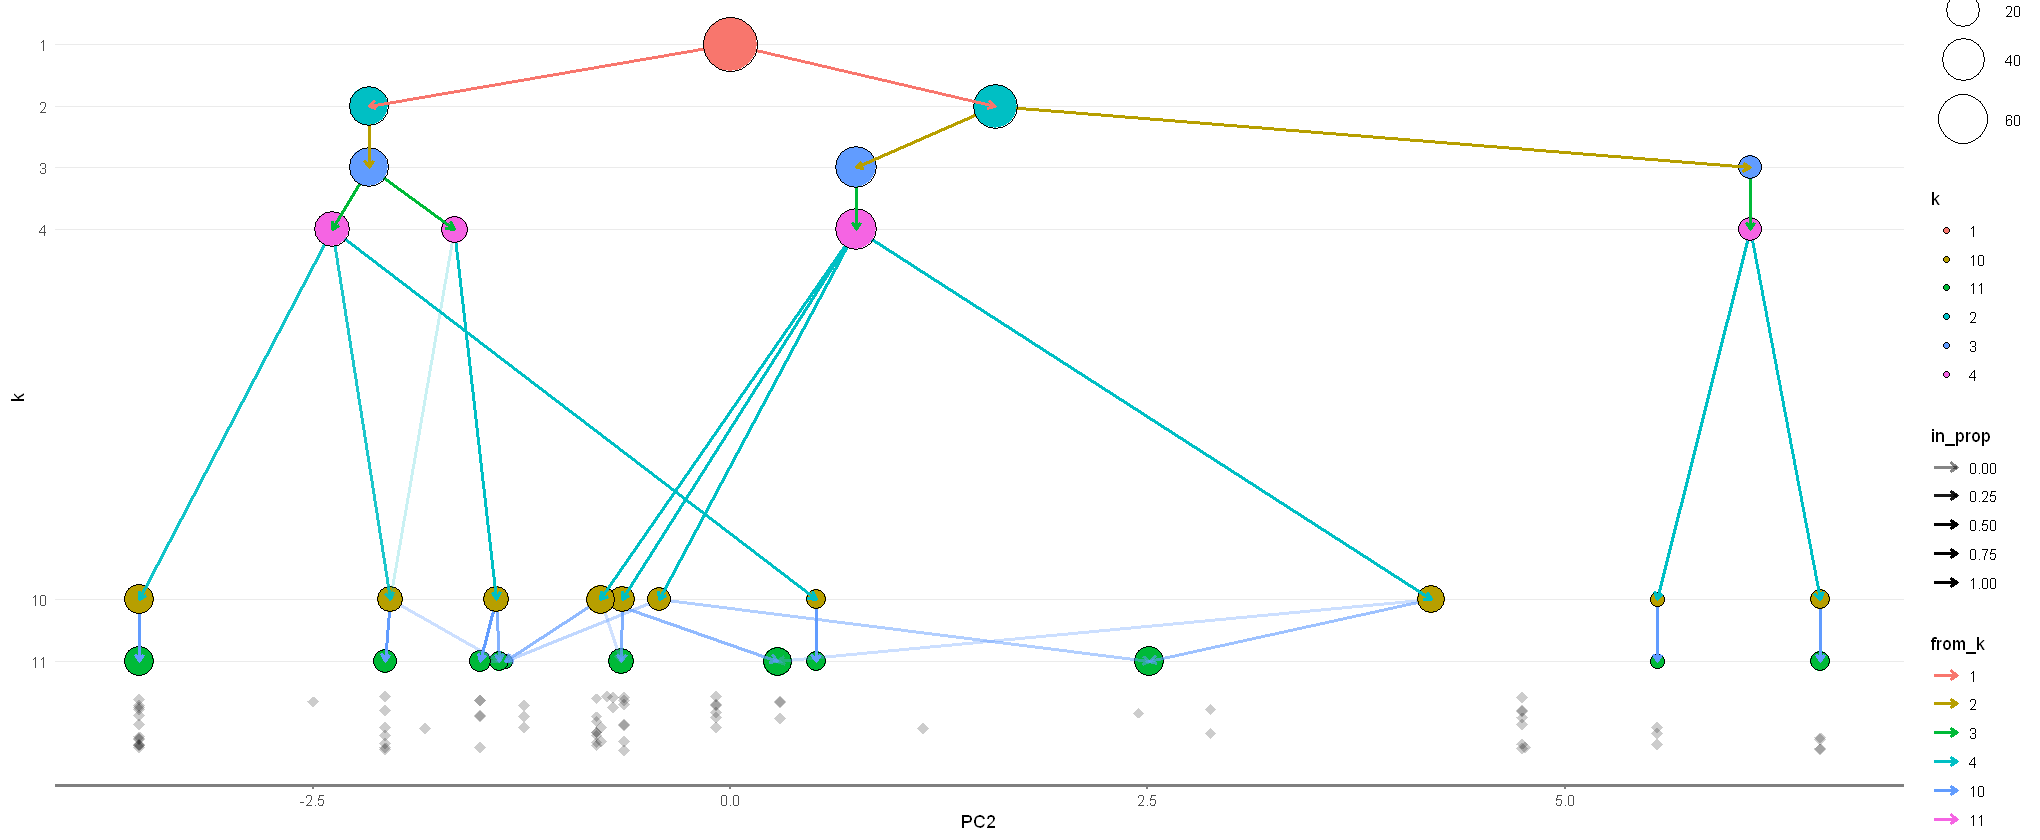

In [62]:
overlay_list <- clustree_overlay(df_subset, prefix = "k", x_value = "PC1",
                                 y_value = "PC2", plot_sides = TRUE)
overlay_list$x_side
overlay_list$y_side

This shows that we can an indication of the correct clustering resolution by examining the edges and we can overly information to assess the quality of the clustering.

List of the optimal index values of the NBClust function

In [63]:
list(optimald2$Best.nc)
list(optimald2$Best.nc[,c(1,2,12, 13, 17, 22, 26)])
#list(optimald$Best.nc)
#list(optimalcomplete$Best.nc)
#list(optimal.kmeans$Best.nc)
list(optimald2$All.index[,c(1,2,12, 13, 17, 22, 26)])
index.d2 <- optimald2$All.index[,c(1,12,13,17,22)]

,KL,CH,Hartigan,CCC,Scott,Marriot,TrCovW,TraceW,Friedman,Rubin,...,Frey,McClain,Gamma,Gplus,Tau,Dunn,Hubert,SDindex,Dindex,SDbw
Number_clusters,3.0000,3.0000,4.0000,7.0000,7.0000,5.000000e+00,4,4.000,6.0000,4.0000,...,2,3.0000,6.0000,7.0000,3.0000,6.0000,0,3.0000,0,7.000
Value_Index,1.6994,40.7882,3.1106,11.7847,95.8927,1.167139e+56,45134302,5536.668,161.7876,-0.0768,...,NA,0.8022,0.8645,35.7985,590.1912,0.3229,0,0.0491,0,0.332


,KL,CH,DB,Silhouette,Ratkowsky,McClain,Dunn
Number_clusters,3.0000,3.0000,6.0000,3.0000,3.0000,3.0000,6.0000
Value_Index,1.6994,40.7882,0.9973,0.3846,0.2534,0.8022,0.3229


,KL,CH,DB,Silhouette,Ratkowsky,McClain,Dunn
3,1.6994,40.7882,1.0252,0.3846,0.2534,0.8022,0.2337
4,1.4141,35.9810,1.2182,0.3350,0.2426,1.0629,0.2491
5,1.1429,32.8167,1.1538,0.3365,0.2410,1.1999,0.2795
6,0.9498,31.0893,0.9973,0.3338,0.2328,1.2826,0.3229
7,1.3905,30.9622,1.2276,0.2646,0.2320,2.4514,0.2493


Dev of bar plot determing the best clustering result is 4 cuts.

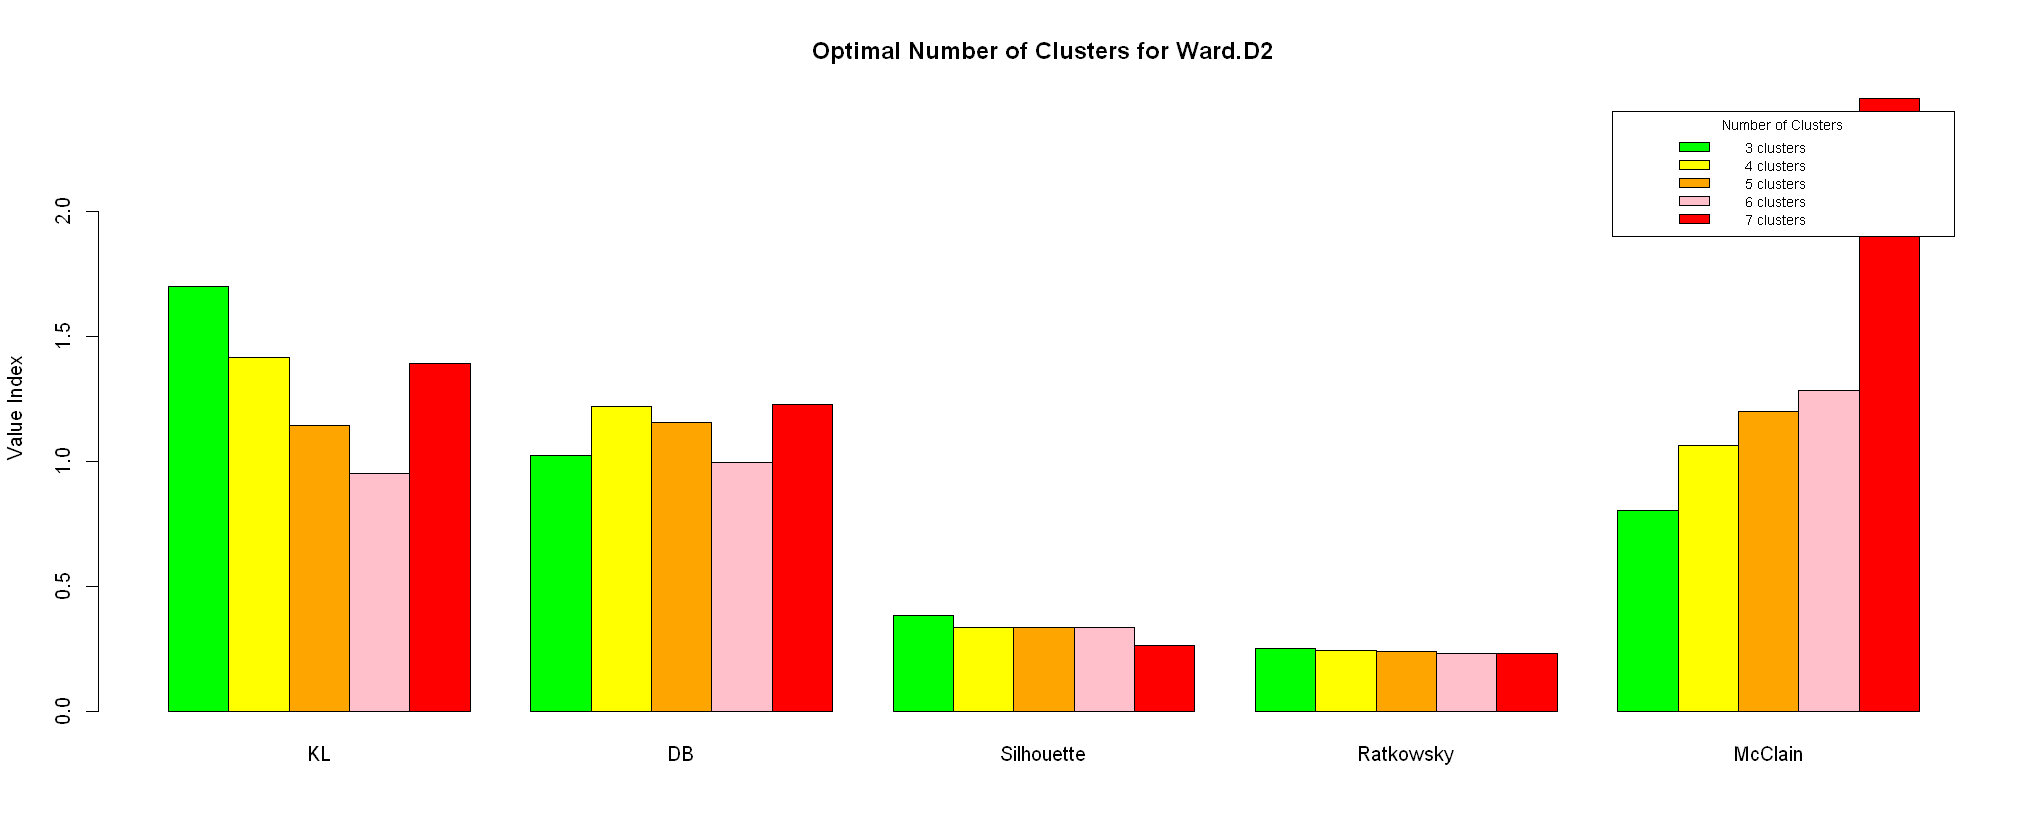

In [64]:
barplot(index.d2, beside = TRUE, main = "Optimal Number of Clusters for Ward.D2",
        col = c("green", "yellow", "orange","pink","red"),
        ylab = "Value Index", legend = c("3 clusters", "4 clusters", "5 clusters","6 clusters","7 clusters"), 
        args.legend = list(title = "Number of Clusters", cex = .7))

Cutting at different tree levels 4 which is the optimal for Ward.D2

In [65]:
clusters_wa <- cutree(hc.ward2,3)     
dfsimple$clusters <- cutree(hc.ward2,3)
head(dfsimple)
write_xlsx(dfsimple , '../../results/dfsimple.xlsx')

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,2
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,2


# Fancy Clustering Graph Majority 

,cluster,n
,<int>,<int>
1,1,38
2,2,33
3,3,7


[[1]]
 [1] "Afghanistan"               "Angola"                   
 [3] "Benin"                     "Burkina Faso"             
 [5] "Burundi"                   "Cameroon"                 
 [7] "Central African Republic"  "Chad"                     
 [9] "Congo"                     "Congo Democratic Republic"
[11] "Cote d'Ivoire"             "Eritrea"                  
[13] "Eswatini"                  "Ethiopia"                 
[15] "Gambia"                    "Ghana"                    
[17] "Guinea"                    "Haiti"                    
[19] "Kenya"                     "Lesotho"                  
[21] "Liberia"                   "Madagascar"               
[23] "Malawi"                    "Mali"                     
[25] "Mauritania"                "Mozambique"               
[27] "Myanmar"                   "Niger"                    
[29] "Nigeria"                   "Papua New Guinea"         
[31] "Rwanda"                    "Sao Tome and Principe"    
[33] "Sierra Leone"              "Tanzania"                 
[35] "Togo"                      "Uganda"                   
[37] "Zambia"                    "Zimbabwe"                 

[[2]]
 [1] "Albania"            "Armenia"            "Azerbaijan"        
 [4] "Bangladesh"         "Bolivia"            "Colombia"          
 [7] "Comoros"            "Dominican Republic" "Egypt"             
[10] "Gabon"              "Guatemala"          "Guyana"            
[13] "Honduras"           "India"              "Indonesia"         
[16] "Jordan"             "Kazakhstan"         "Kyrgyz Republic"   
[19] "Maldives"           "Namibia"            "Nepal"             
[22] "Nicaragua"          "Pakistan"           "Peru"              
[25] "Philippines"        "Senegal"            "South Africa"      
[28] "Tajikistan"         "Timor-Leste"        "Turkey"            
[31] "Turkmenistan"       "Uzbekistan"         "Yemen"             

[[3]]
[1] "Brazil"   "Cambodia" "Moldova"  "Morocco"  "Paraguay" "Ukraine"  "Vietnam"

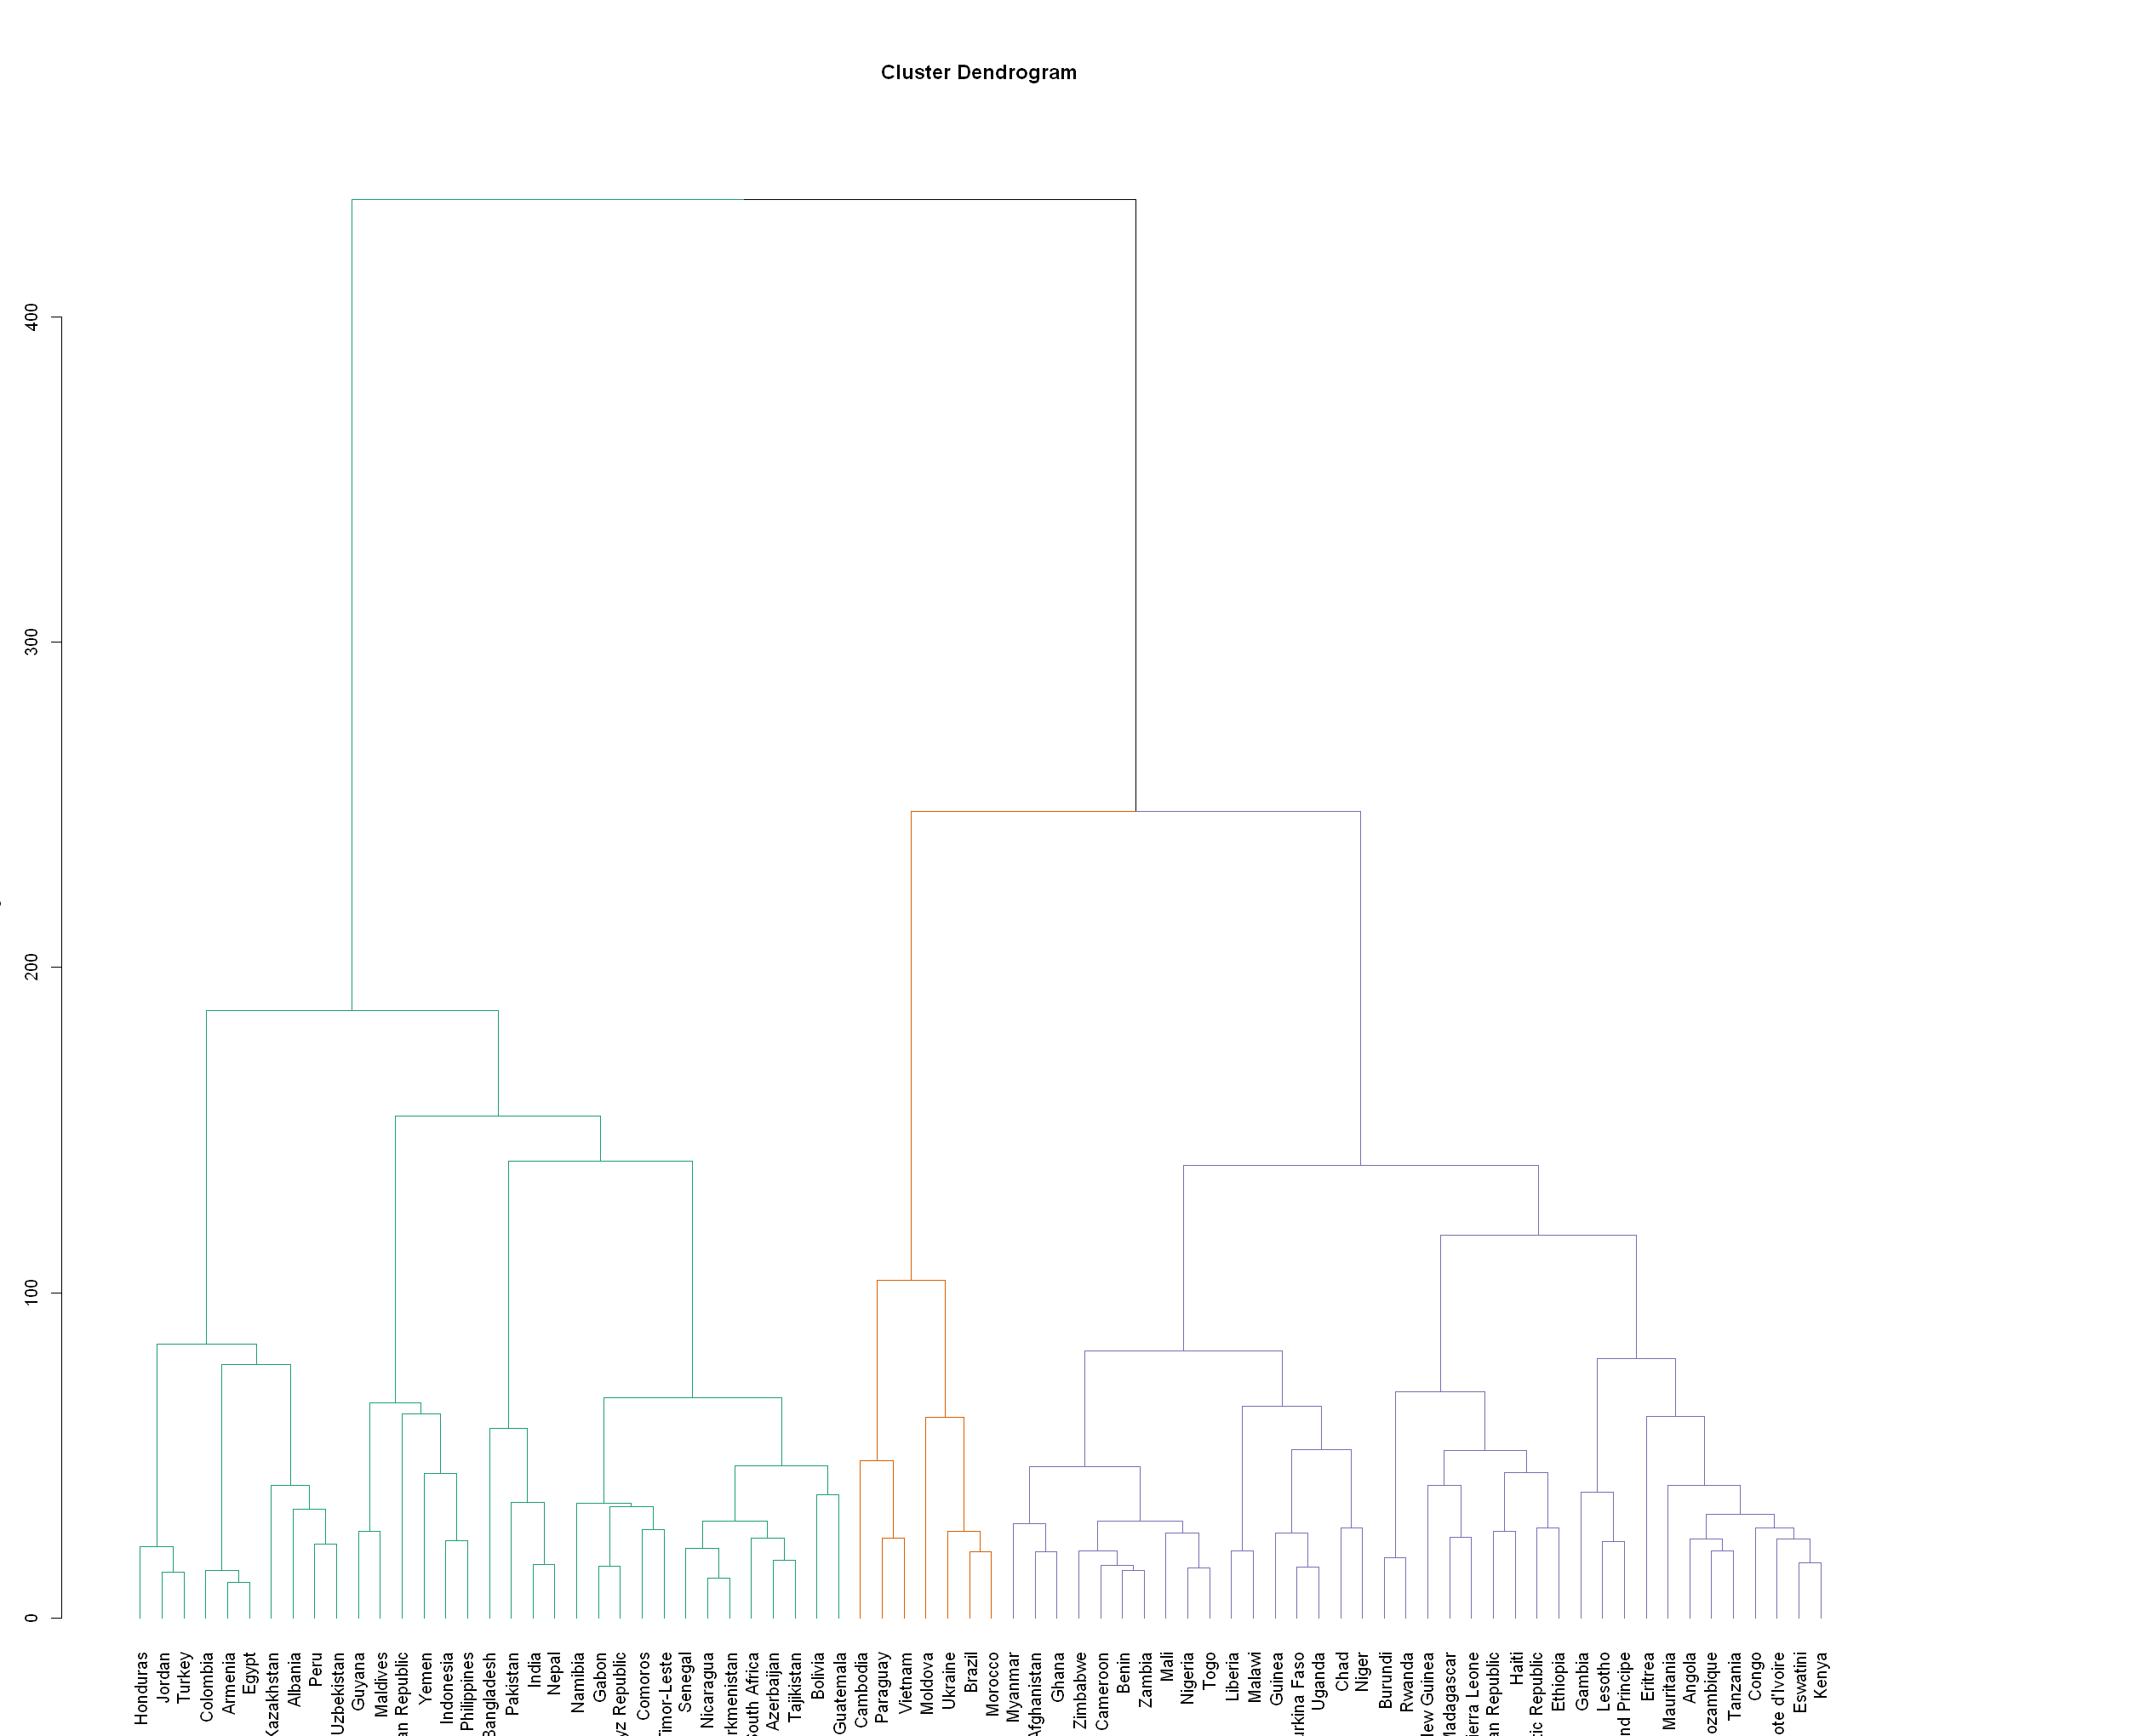

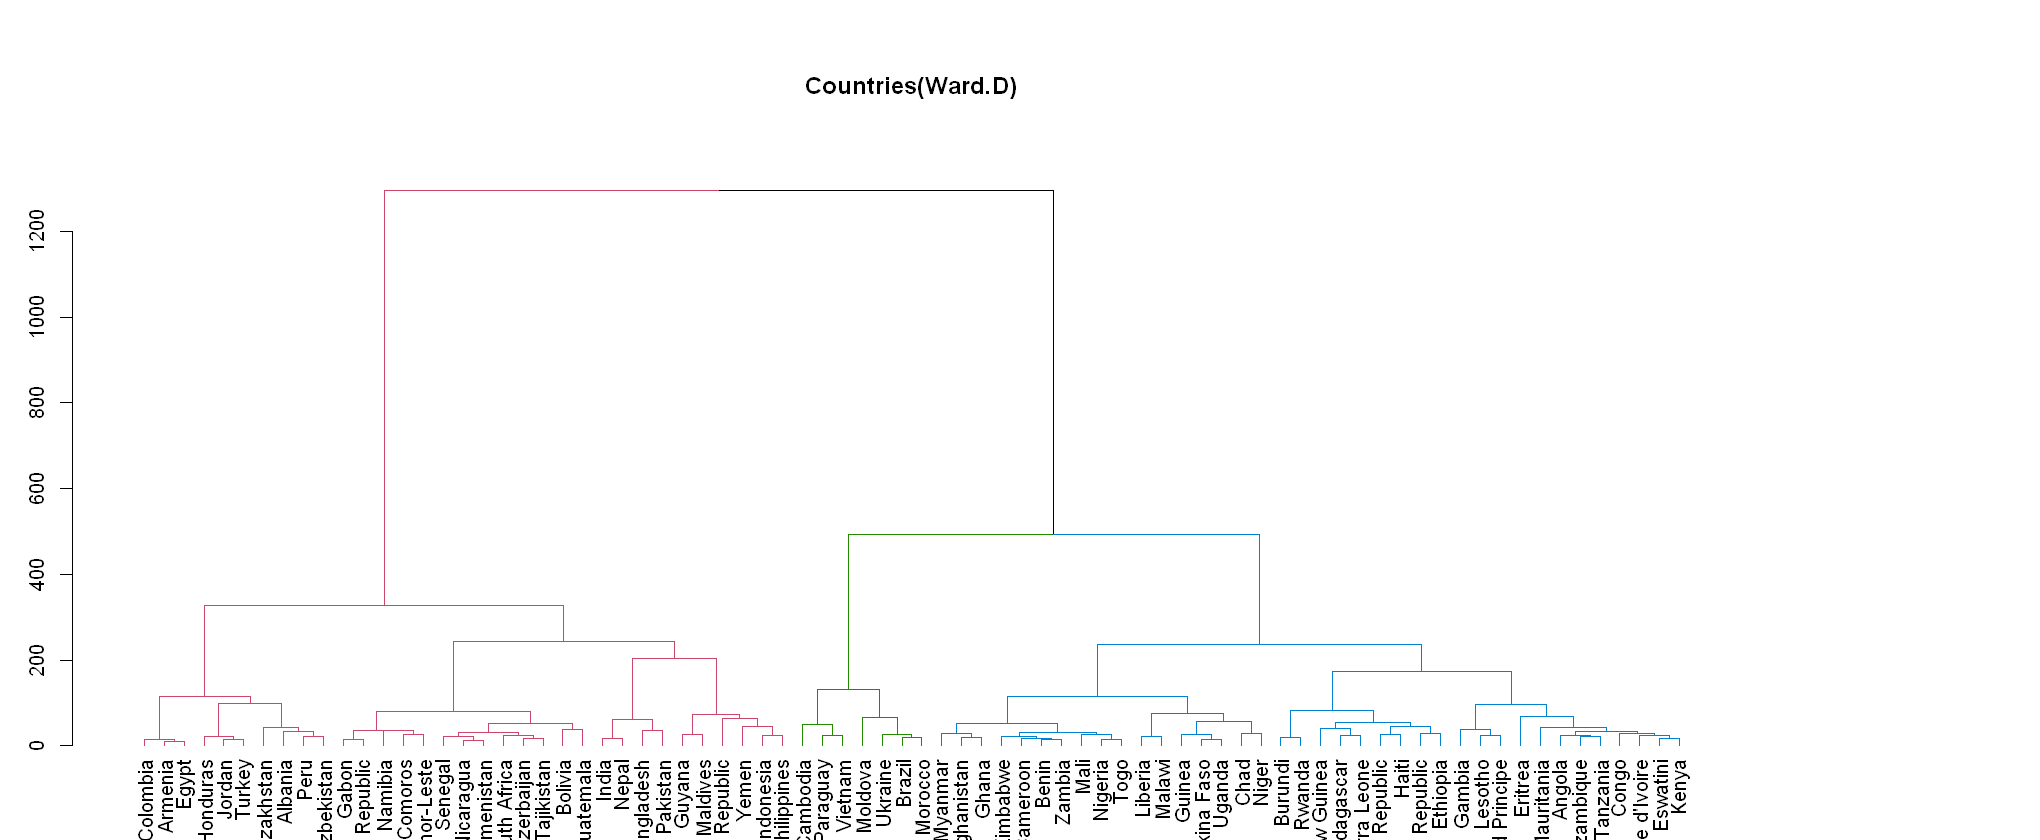

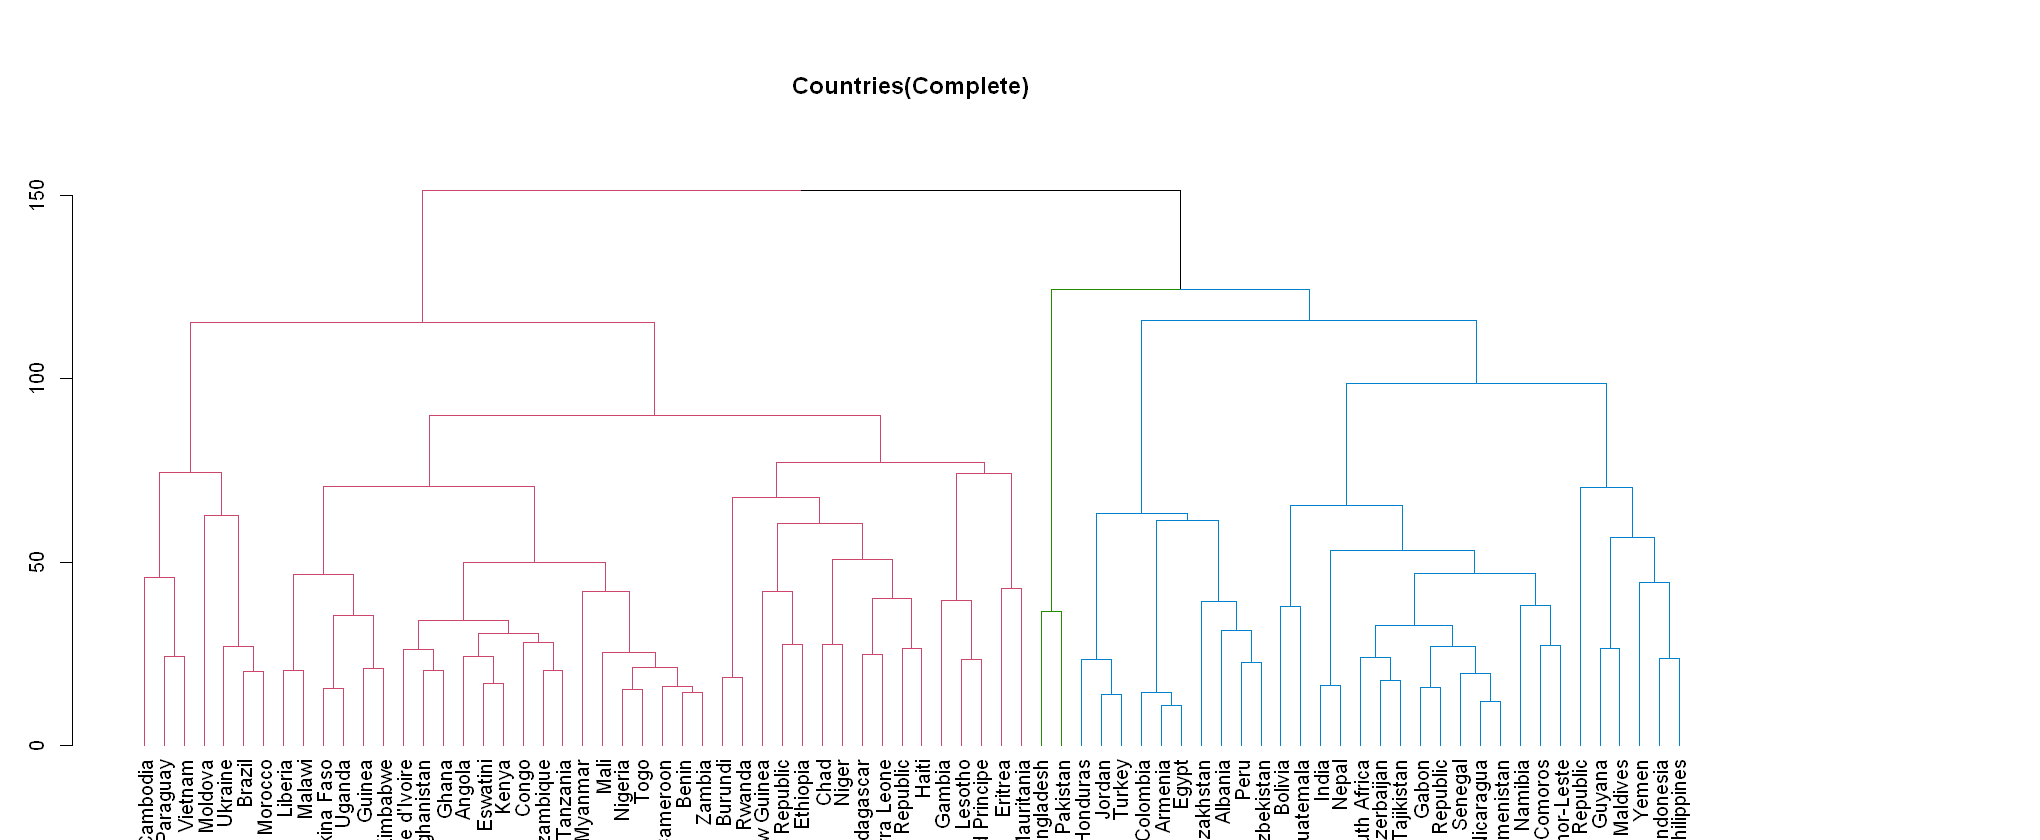

In [66]:
dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=3, col = c("#1b9e77","#d95f02","#7570b3"))
labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=21, repr.plot.height=17)
par(mar = c(3,3,7,12))
par(cex=1)
plot(dend, main="Cluster Dendrogram", xlab="", 
     ylab="Height",horiz=FALSE )


df.wa.d2.avg <- mutate(df.wa, cluster = clusters_wa)
count(df.wa.d2.avg, cluster)

sapply(unique(clusters_wa),function(g)dfsimple$Country[clusters_wa == g])

dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=3)
labels(dend) <- dfsimple$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Ward.D)", xlab="", 
     ylab="", cex=.5,  )

dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=3)
labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries(Complete)", xlab="", 
     ylab="", cex=.5,  )
   


# K-Mean Clustering in R

List of 9
 $ cluster     : int [1:78] 2 1 2 1 1 1 2 1 2 2 ...
 $ centers     : num [1:2, 1:17] 33.46 9.14 14.51 8.49 7.76 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:17] "phom" "pipy" "ptap" "bore" ...
 $ totss       : num 241423
 $ withinss    : num [1:2] 63231 83139
 $ tot.withinss: num 146370
 $ betweenss   : num 95053
 $ size        : int [1:2] 33 45
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 2 clusters of sizes 33, 45

Cluster means:
       phom      pipy      ptap      bore     pwel     pspr     rain      uwel
1 33.460606 14.506061  7.760606  9.245455 2.060606 1.703030 3.290909  2.427273
2  9.135556  8.486667 14.684444 15.008889 9.433333 4.173333 2.040000 10.042222
       uspr     truc      ctan      bott      othw     surw     tles      tmor
1 0.9545455 2.139394 0.5060606 13.209091 0.6121212 2.672727 16.41818  2.769697
2 5.6088889 0.900000 0.5155556  1.291111 0.3600000 6.922222 44.39778 14.168889
      watp
1 80.09091
2 24.70667

Clustering vector:
 [1] 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 2 2 1 2 2 1 2 1 2 1 1 1 1 1 2
[39] 1 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 1 2 2 1 1 2 2 1 2 1 1 2 1 2 1 1 2 2 1 2 1
[77] 2 2

Within cluster sum of squares by cluster:
[1] 63230.71 83139.23
 (between_SS / total_SS =  39.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"       

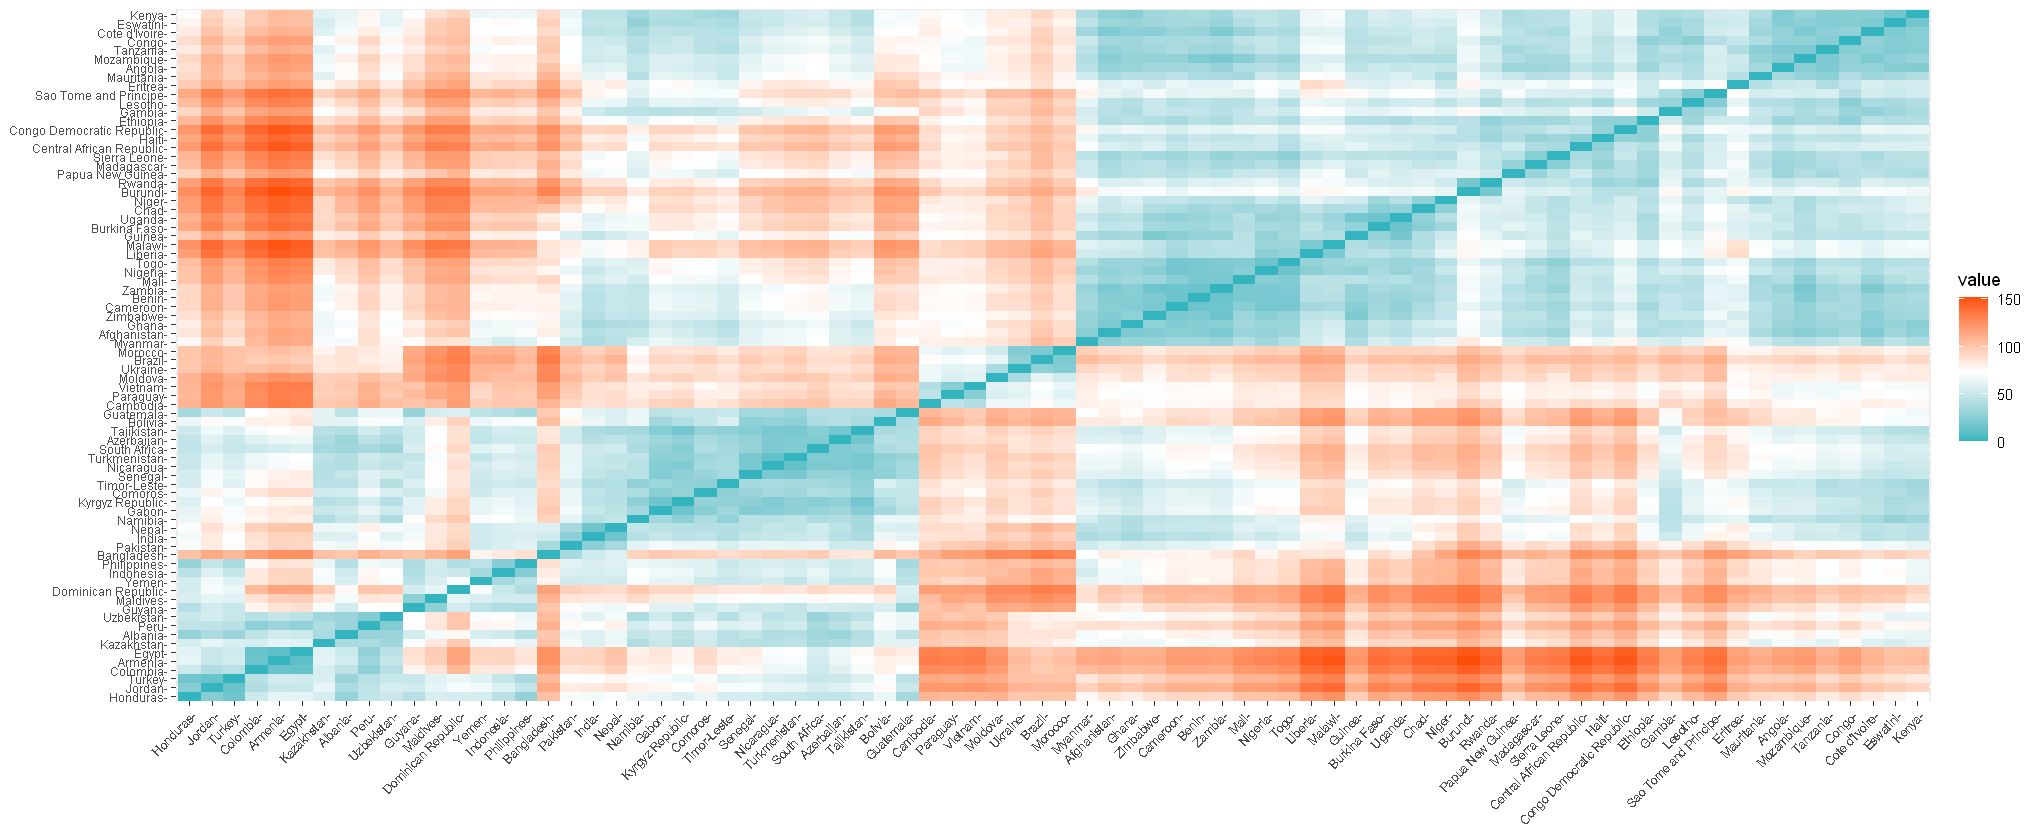

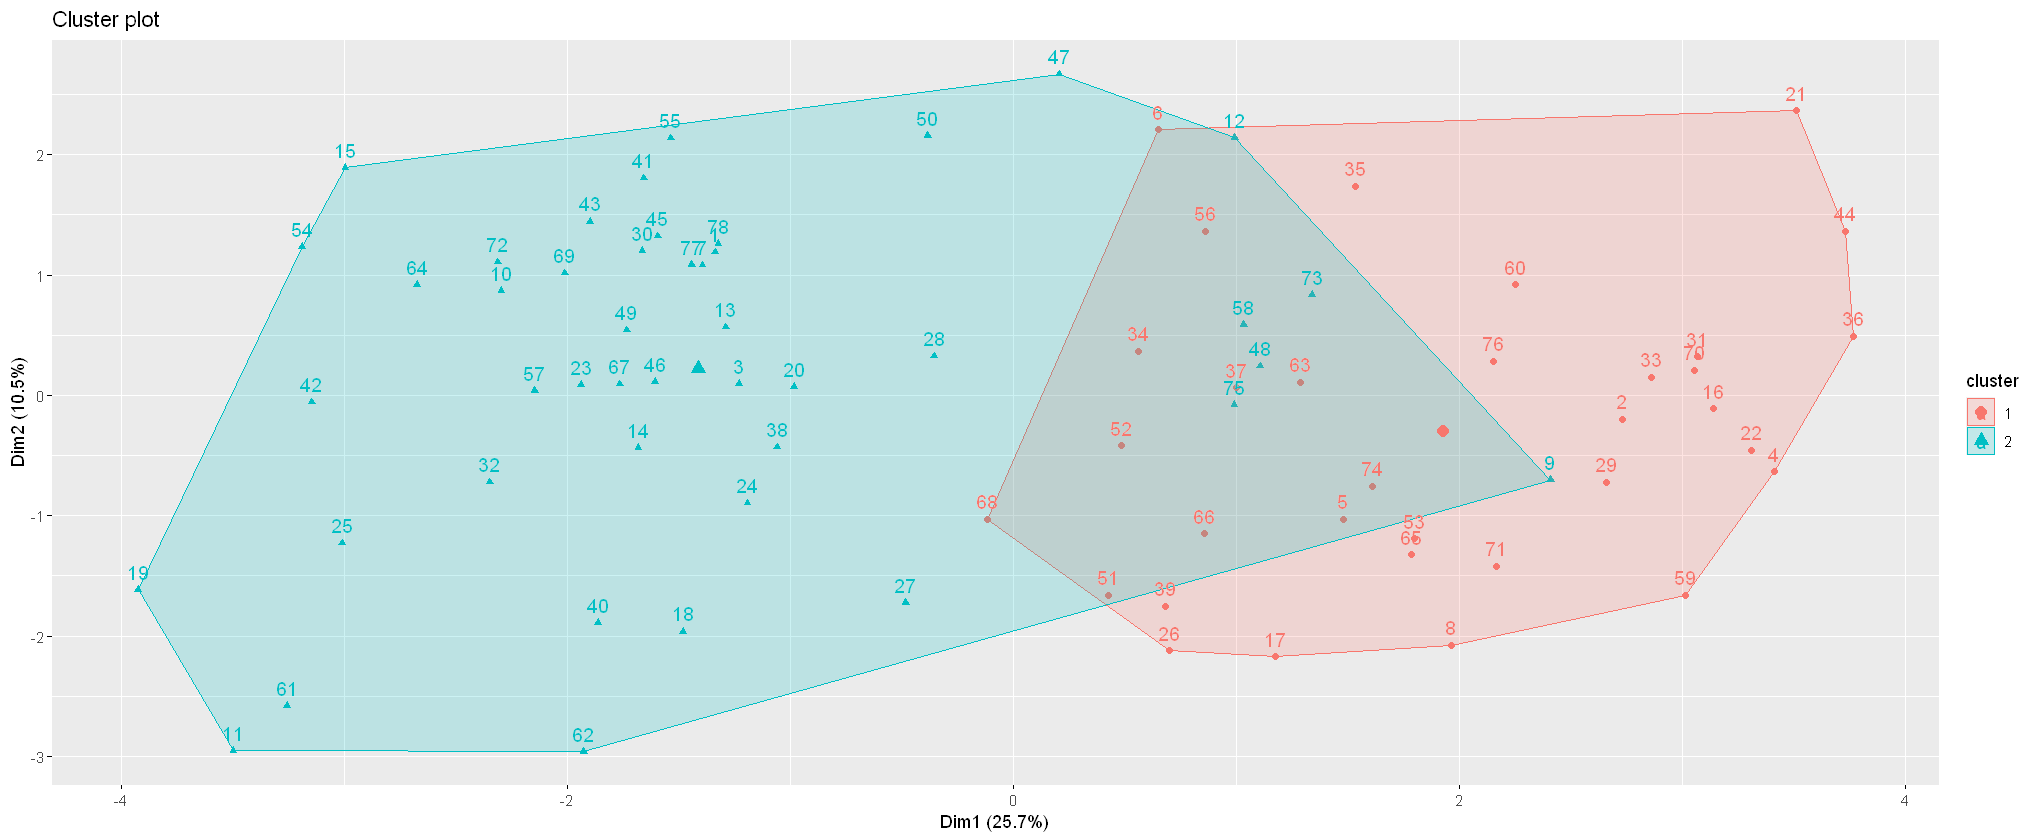

List of 9
 $ cluster     : int [1:78] 1 3 1 3 2 2 1 2 4 1 ...
 $ centers     : num [1:4, 1:17] 4.98 20.23 63.89 31.71 8.89 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:17] "phom" "pipy" "ptap" "bore" ...
 $ totss       : num 241423
 $ withinss    : num [1:4] 43115 37038 8743 9296
 $ tot.withinss: num 98192
 $ betweenss   : num 143231
 $ size        : int [1:4] 38 23 10 7
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


K-means clustering with 4 clusters of sizes 38, 23, 10, 7

Cluster means:
       phom      pipy      ptap      bore      pwel      pspr     rain
1  4.976316  8.894737 16.957895 17.028947  9.110526 4.8447368 1.128947
2 20.230435 19.278261  9.552174 12.934783  2.691304 1.9565217 4.491304
3 63.890000  3.530000  3.640000  0.760000  0.610000 1.1200000 0.530000
4 31.714286  6.271429  2.342857  4.042857 11.185714 0.5285714 6.985714
       uwel      uspr      truc      ctan      bott      othw     surw     tles
1 11.242105 6.6078947 0.9921053 0.5342105  1.000000 0.3447368 7.784211 52.57632
2  2.126087 1.3043478 1.9347826 0.6913043 12.547826 0.5608696 2.930435 18.40435
3  3.120000 0.1500000 2.6100000 0.0800000 14.730000 0.7300000 2.080000 11.85000
4  3.528571 0.1857143 0.4000000 0.4142857  2.871429 0.4428571 2.242857  0.00000
       tmor     watp
1 16.778947 29.25789
2  3.473913 77.23913
3  1.150000 86.65000
4  0.000000  0.00000

Clustering vector:
 [1] 1 3 1 3 2 2 1 2 4 1 1 4 1 1 1 3 2 1 1 1 2

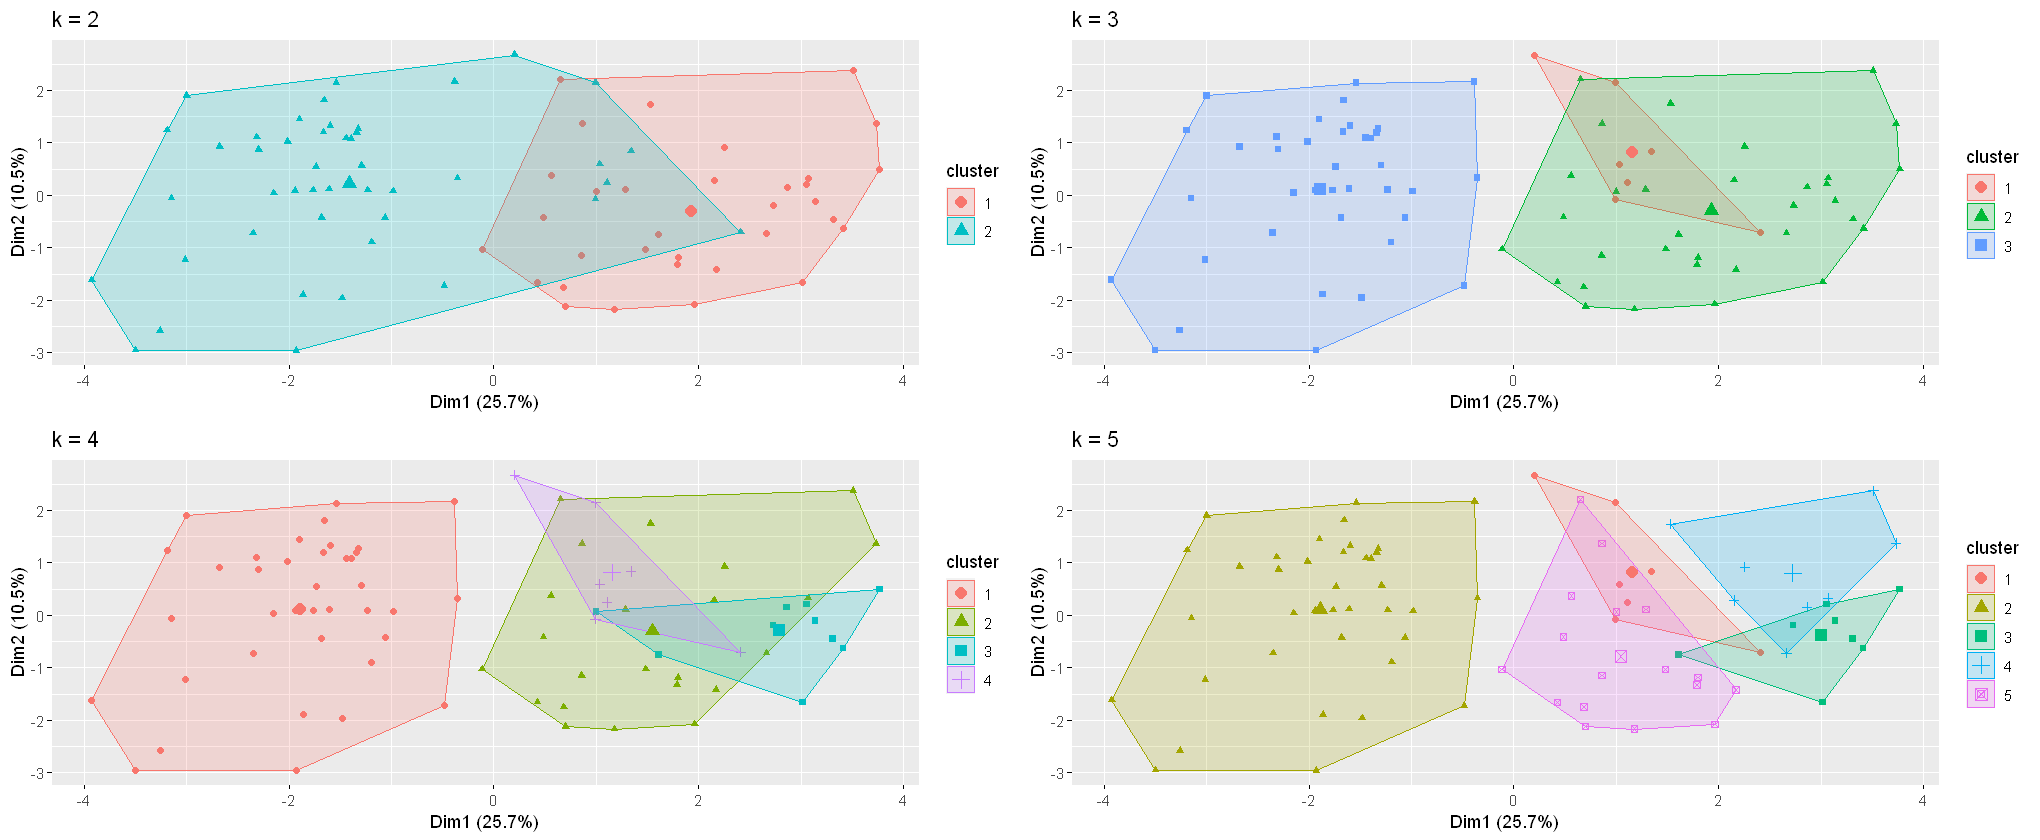

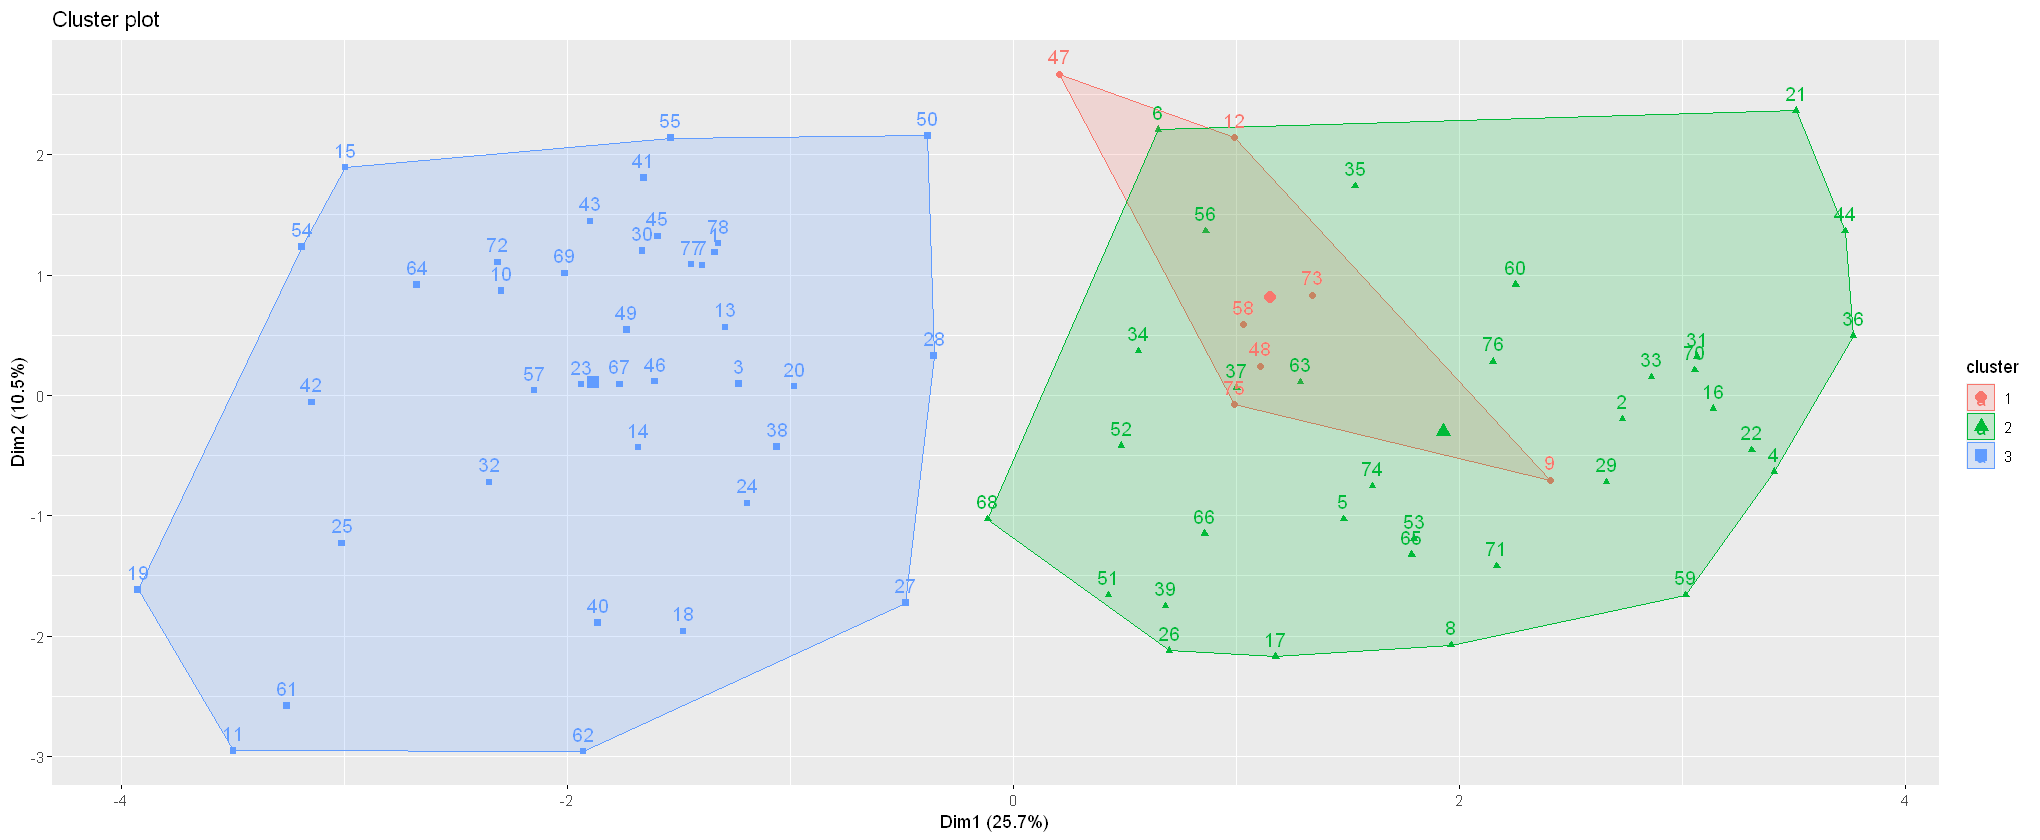

In [67]:
distance <- get_dist(df.wa)
labels(distance) <- dfsimple$Country
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high="#FC4E07"), lab_size = 7 )
k2 <- kmeans(df.wa, centers = 2, nstart = 25)
str(k2)
k2
fviz_cluster(k2, data = df.wa ,  )
# it is often advantageous to use several different values of k and examine the differences in the results.
# We can execute the same process for 3, 4, and 5 clusters, and the results are shown in the figure:
k3 <- kmeans(df.wa, centers = 3, nstart = 25)
k4 <- kmeans(df.wa, centers = 4, nstart = 25)
k5 <- kmeans(df.wa, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df.wa) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df.wa) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df.wa) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df.wa) + ggtitle("k = 5")
grid.arrange(p1, p2, p3, p4, nrow = 2)
str(k4)
k4
fviz_cluster(k3, data = df.wa , )

# Gap Stat Method

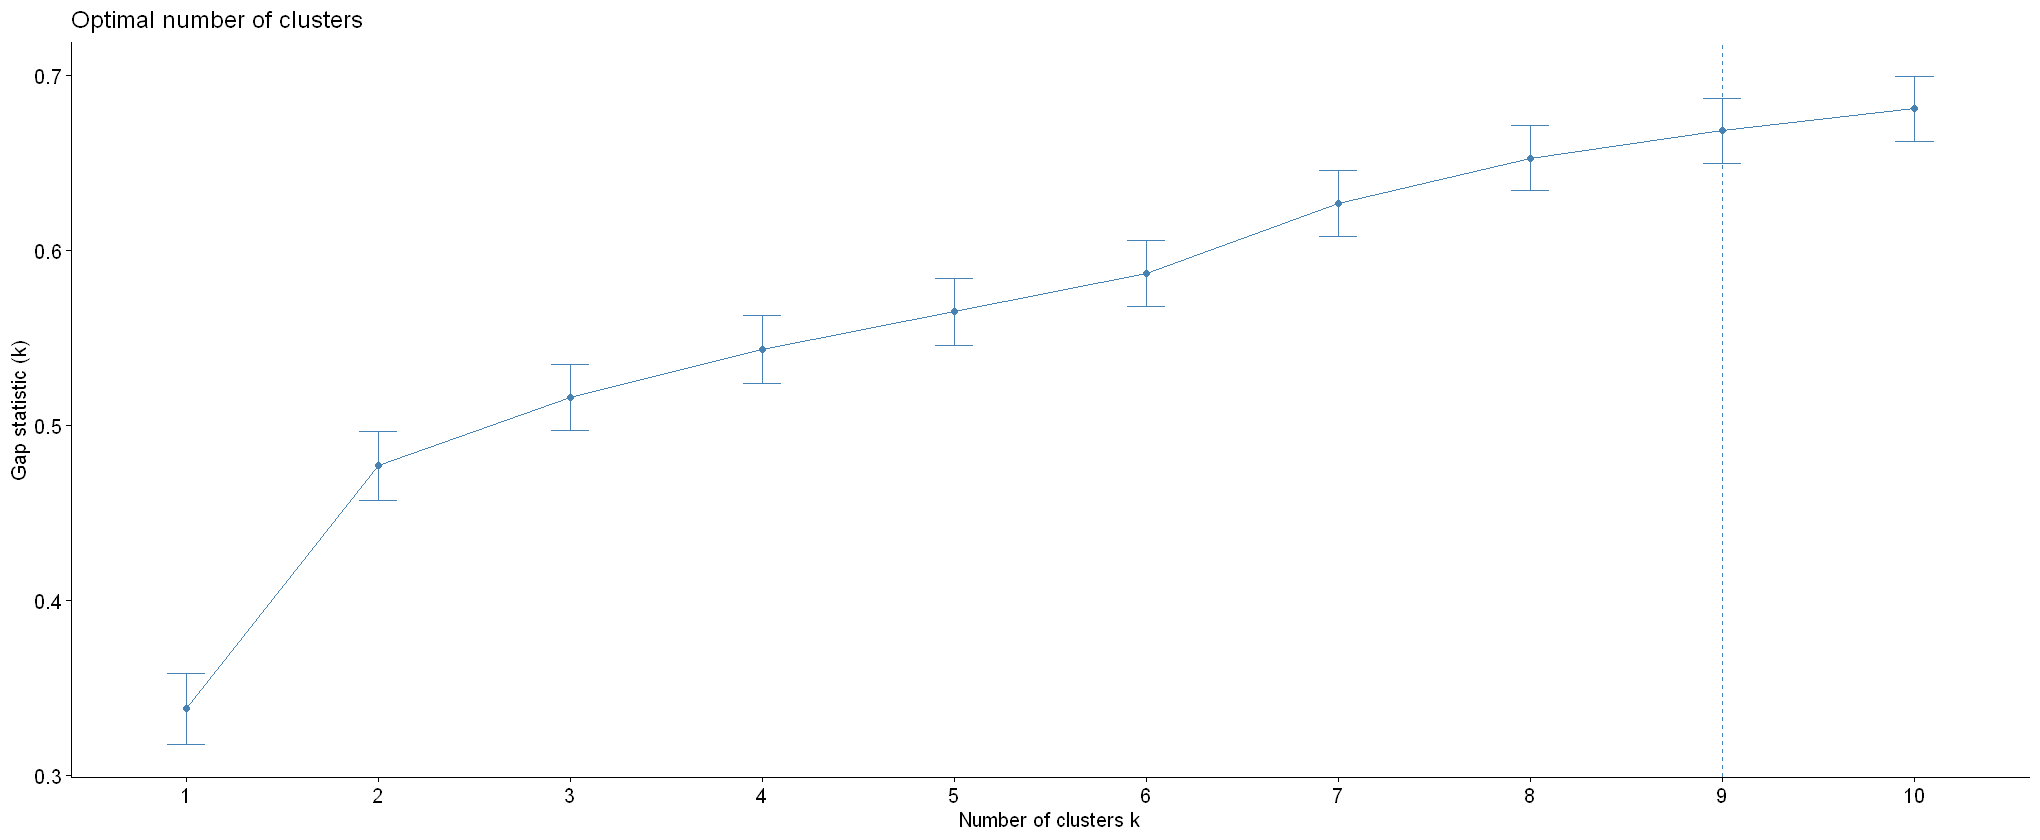

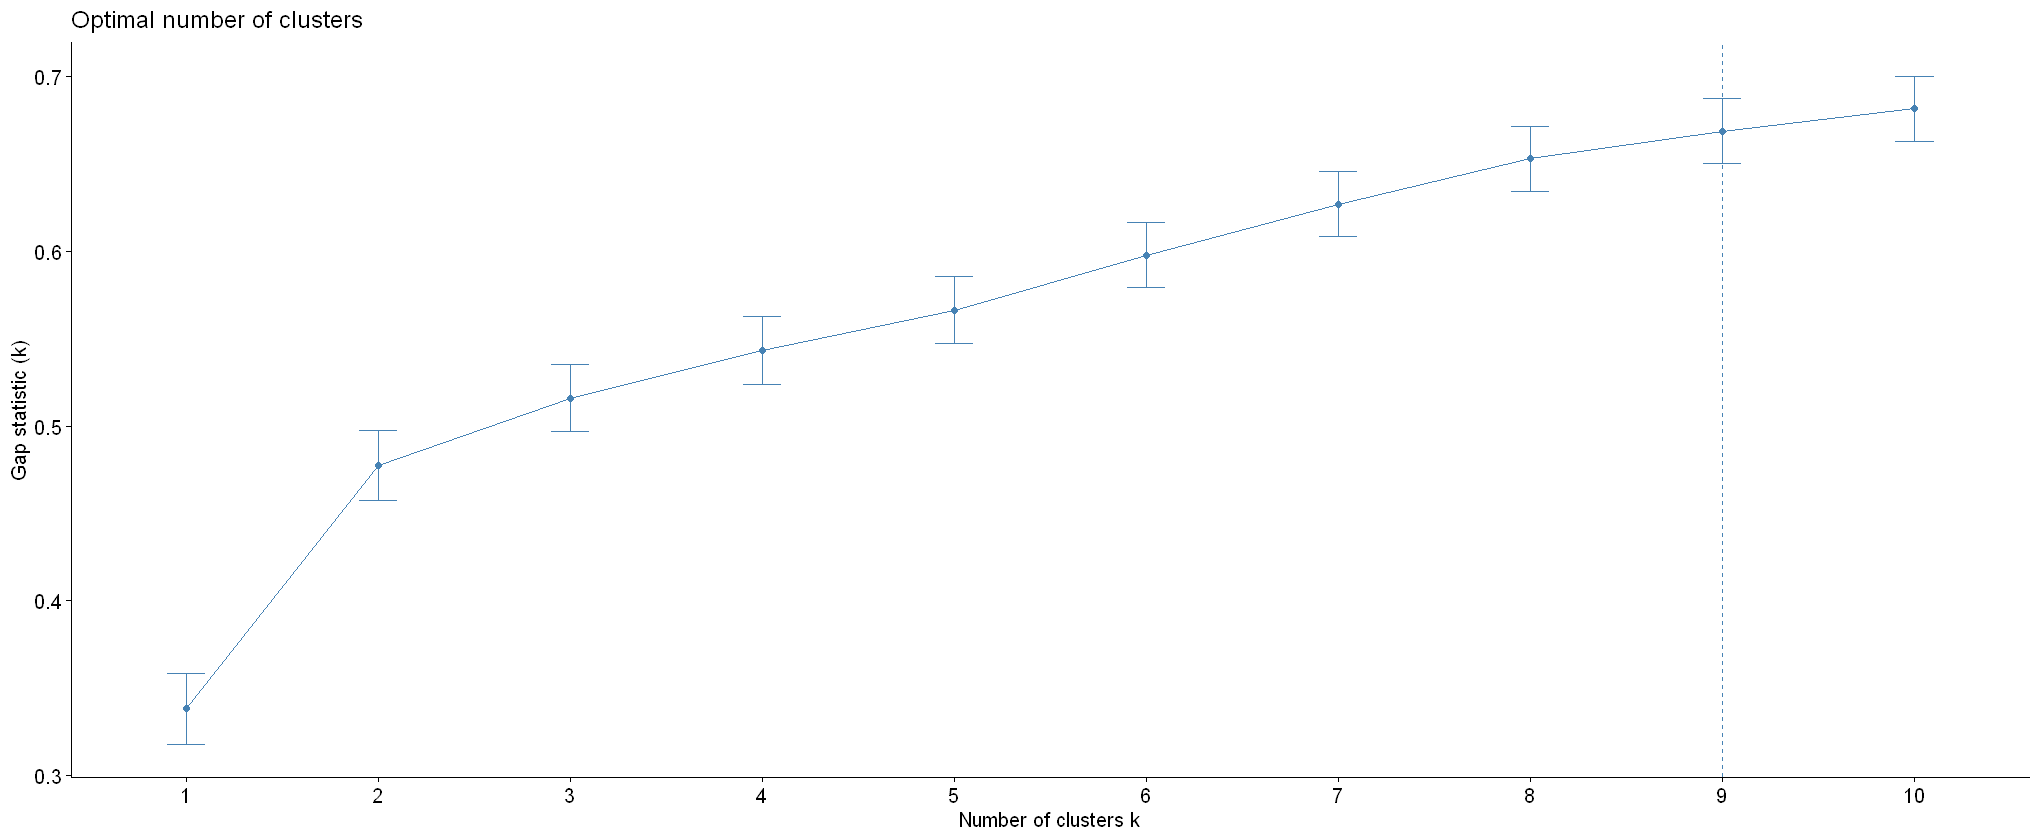

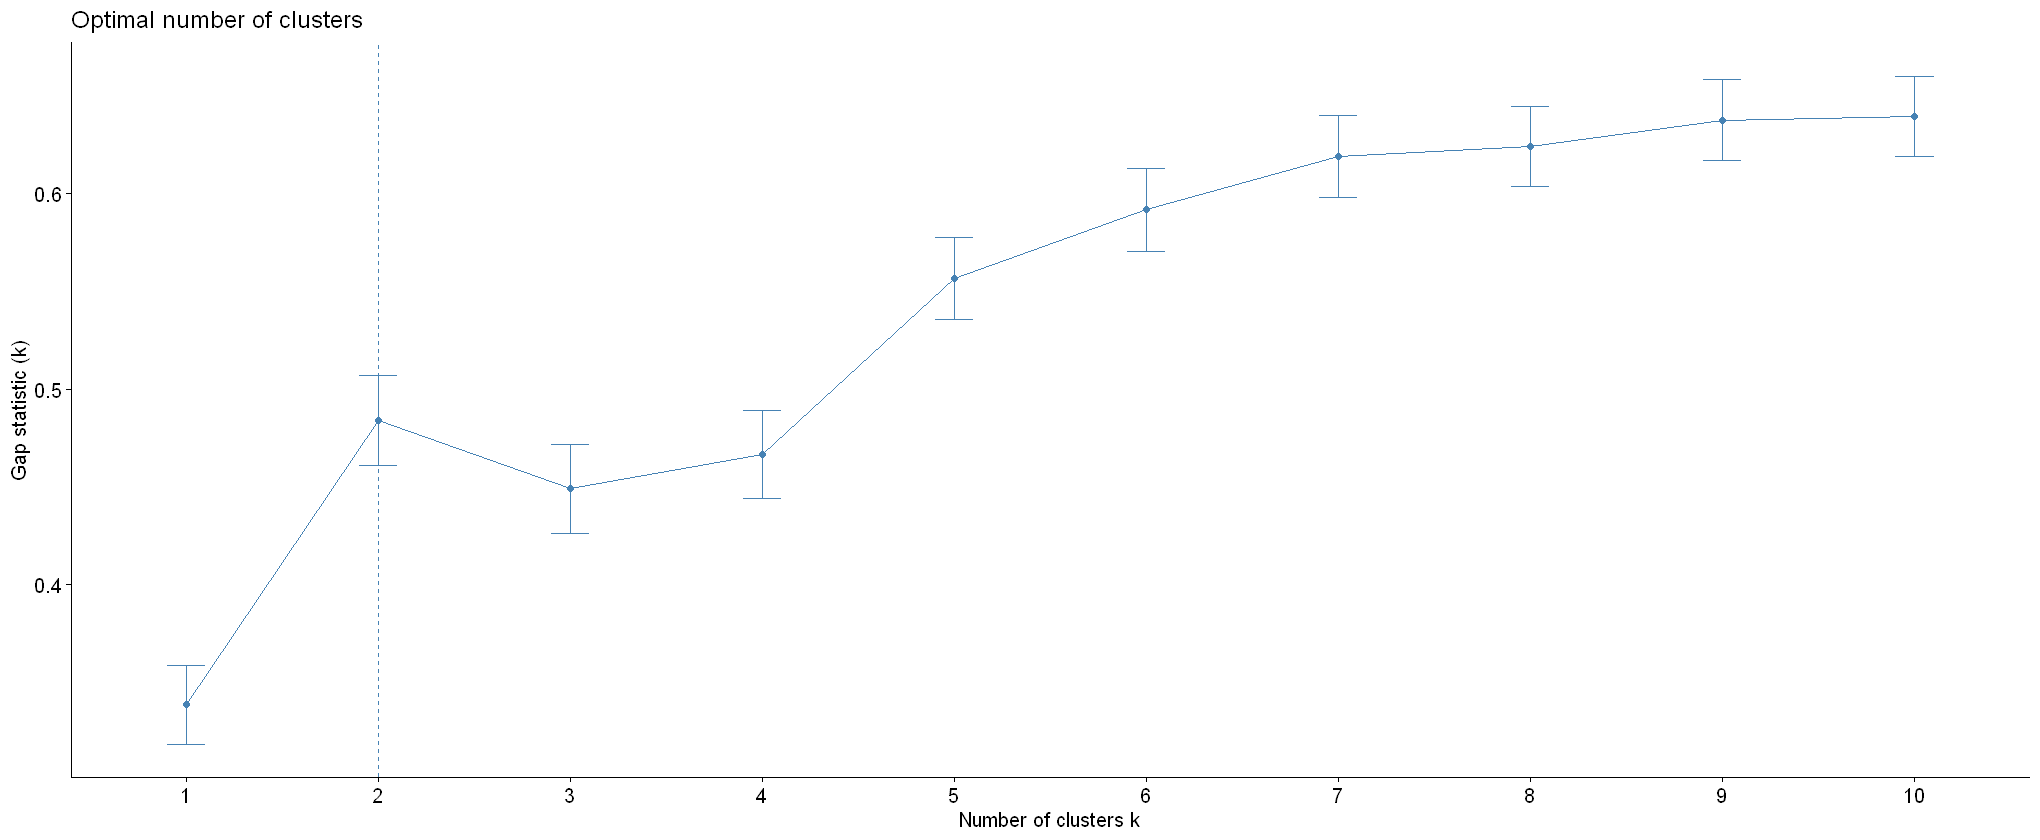

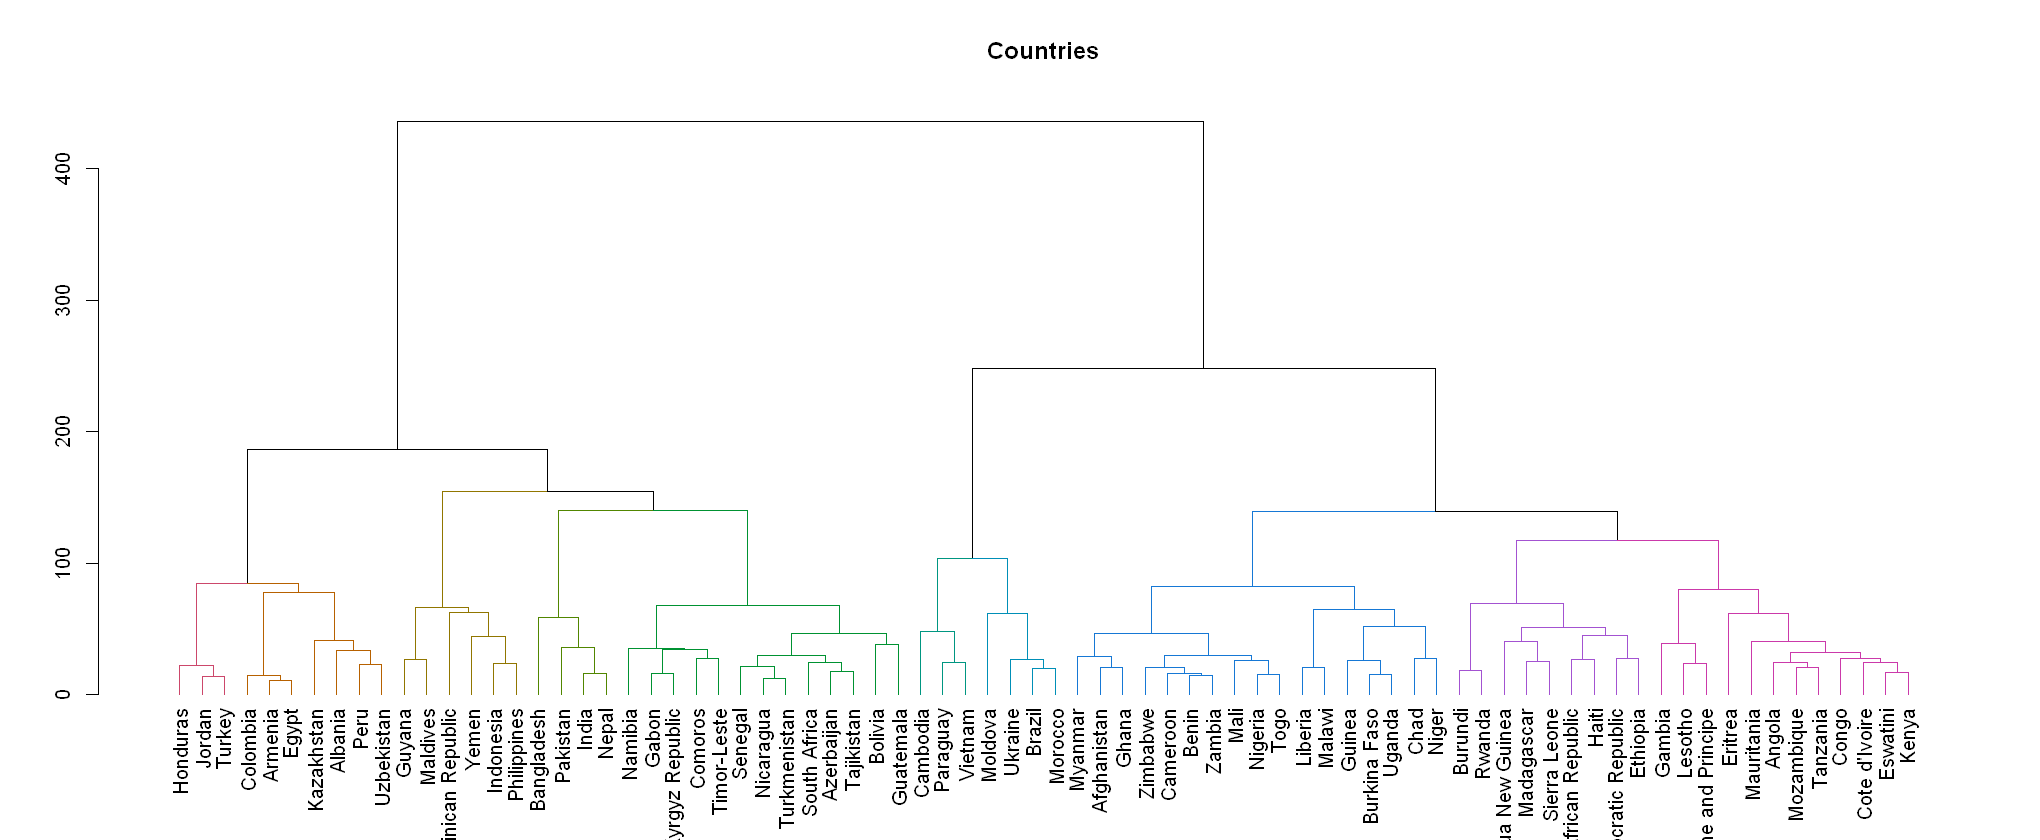

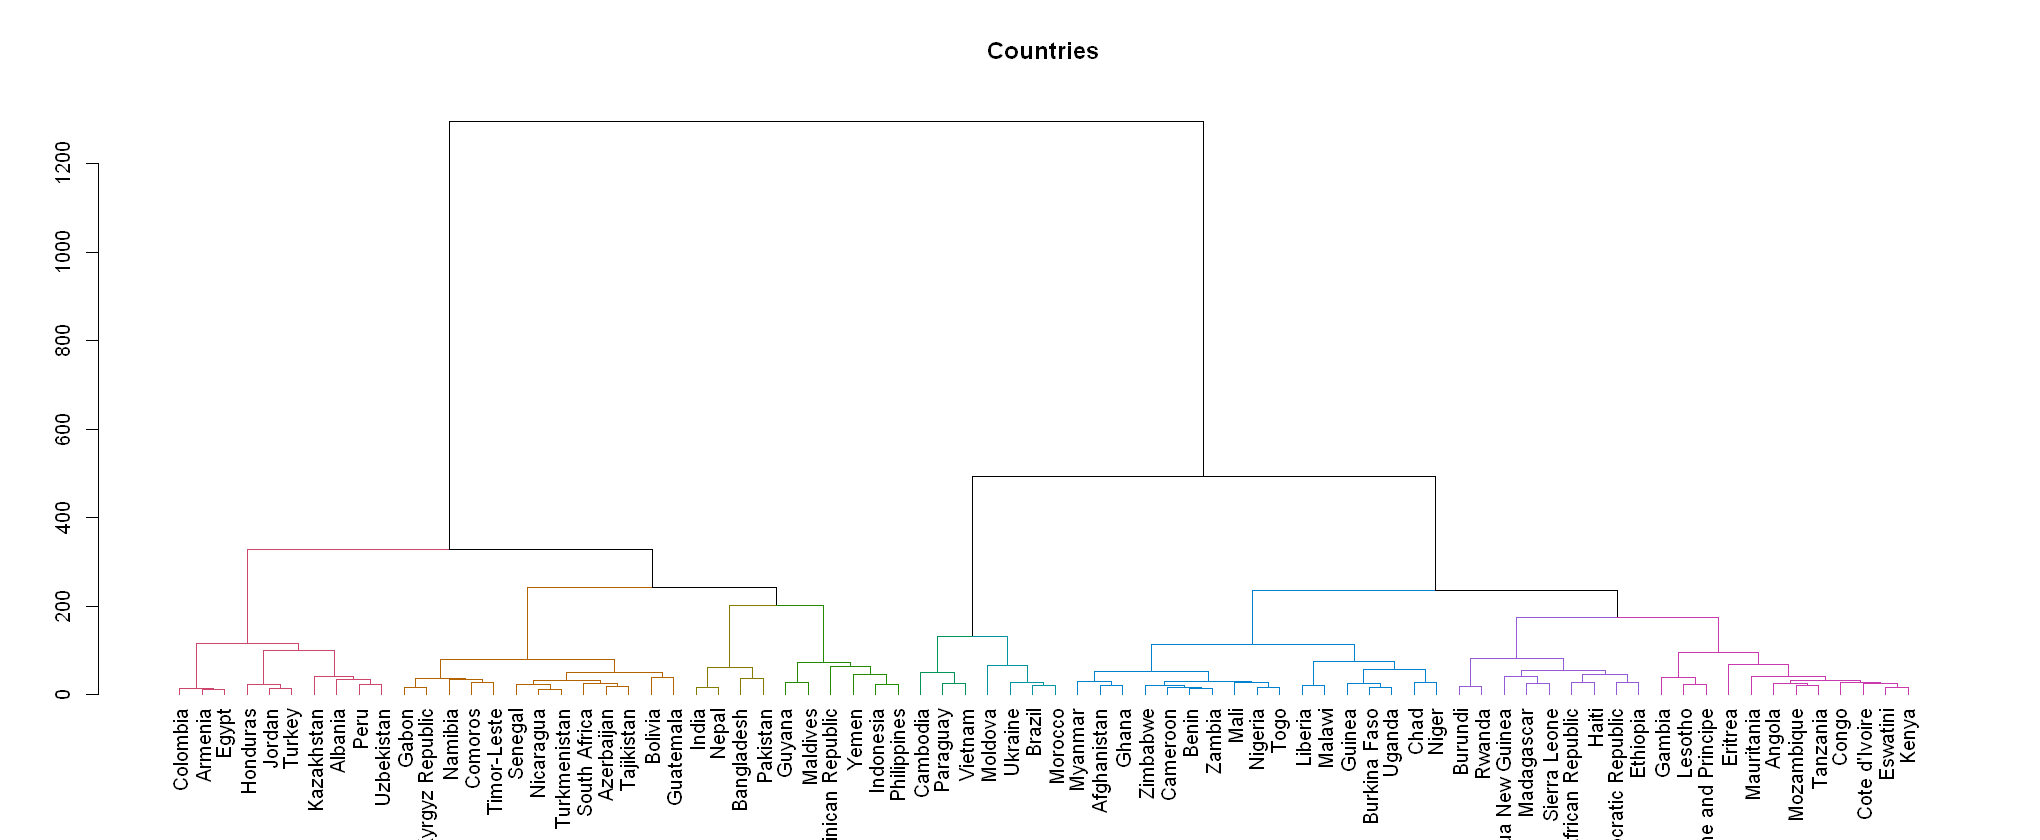

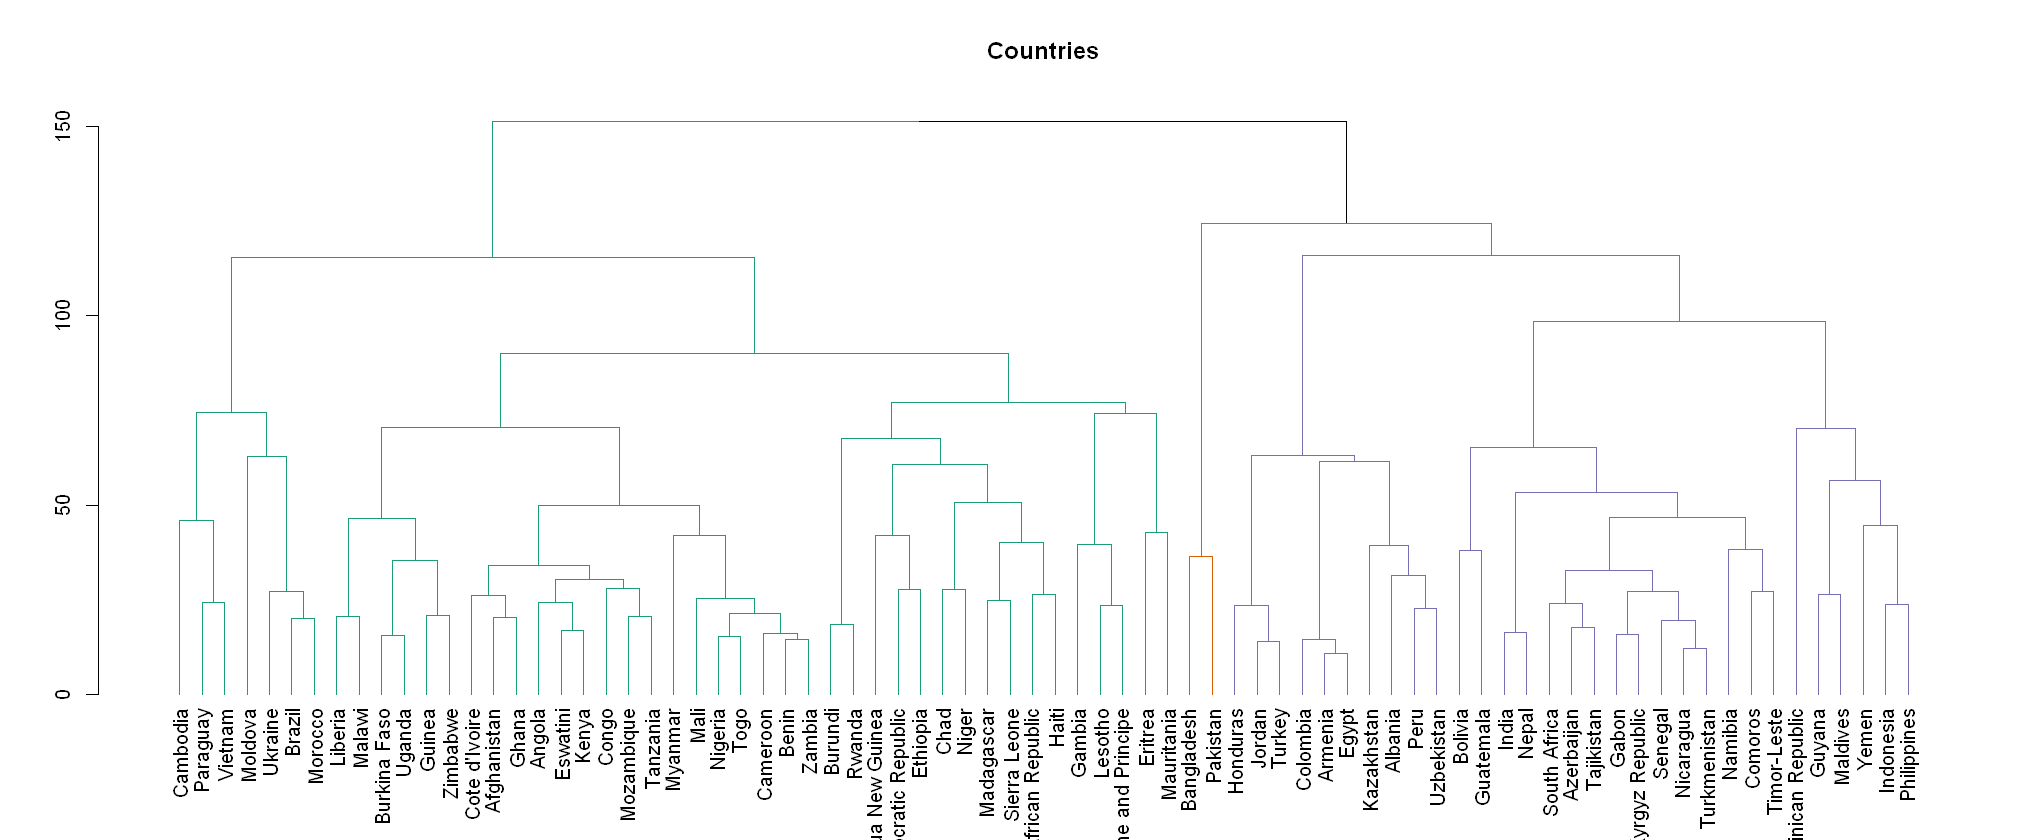

In [68]:
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D2" ,
                    K.max = 10, B = 1000,  method = c('Tibs2001SEmax'))
fviz_gap_stat(gap_stat)


set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="ward.D" ,
                    K.max = 10, B = 1000, method ='Tibs2001SEmax', SE.factor = 1)

fviz_gap_stat(gap_stat)
set.seed(123)
gap_stat <- clusGap(df.wa, hcut, hc_method ="complete" ,
                    K.max = 10, B = 1000)
fviz_gap_stat(gap_stat)
### Fancy Clustering Graph for WARD D2 Gap ### 
dend <- as.dendrogram(hc.ward2)
dend <- color_branches(dend, k=10)

labels(dend) <- dfsimple$Country[hc.ward2$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Ward Gap ###
dend <- as.dendrogram(hc.ward)
dend <- color_branches(dend, k=9)

labels(dend) <- dfsimple$Country[hc.ward$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )

### Complete Gap ###
dend <- as.dendrogram(hc.complete)
dend <- color_branches(dend, k=3,col = c("#1b9e77","#d95f02","#7570b3"))

labels(dend) <- dfsimple$Country[hc.complete$order]
options(repr.plot.width=17, repr.plot.height=7)
plot(dend, main="Countries", xlab="", 
     ylab="", cex=.3,  )